In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 13.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing 

In [4]:
demand = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/demand.csv')
forward_prices = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/forward_prices.csv')
generation = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/generation.csv')
hvdc = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/hvdc.csv')
price = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/price.csv')
reserve_prices = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/reserve_prices.csv')
weather_data = pd.read_csv('/kaggle/input/newzealand-electricity-prices/raw_data/weather_data.csv')

## Demand 

In [5]:
demand 

Date  demand_CNI  demand_LNI  demand_LSI  demand_UNI  demand_USI
0     2014-01-01  19962.6600   6761.1300  21152.1515  22446.3200  10238.1035
1     2014-01-02  18546.3555   4766.8115  20567.7815  22908.5085  10553.1490
2     2014-01-03  19375.5250   6078.8145  21140.6970  24786.2055  11851.2940
3     2014-01-04  20320.8580   6477.3870  21553.2415  24157.0225  12183.0195
4     2014-01-05  19368.5875   4383.7420  21406.4185  23751.9580  12776.7400
...          ...         ...         ...         ...         ...         ...
3221  2022-10-27  21782.2685  14652.9580  25803.6075  29030.1475  18823.0240
3222  2022-10-28  21831.4470  14241.9715  24520.0880  28872.2045  17555.6600
3223  2022-10-29  20468.6390  13196.8375  23241.0075  26111.4665  14421.3320
3224  2022-10-30  20174.3045  12501.9320  22906.2285  25926.7760  13879.7355
3225  2022-10-31  21485.1965  13970.0500  23571.9495  28982.3900  15971.8010

[3226 rows x 6 columns]

In [6]:
demand['date'] = pd.to_datetime(demand['Date'])
demand = demand.drop('Date' , axis = 1)
demand.set_index('date', inplace=True)

In [7]:
for column in demand.columns:
    scaler = MinMaxScaler()
    demand[column] = scaler.fit_transform(demand[[column]])

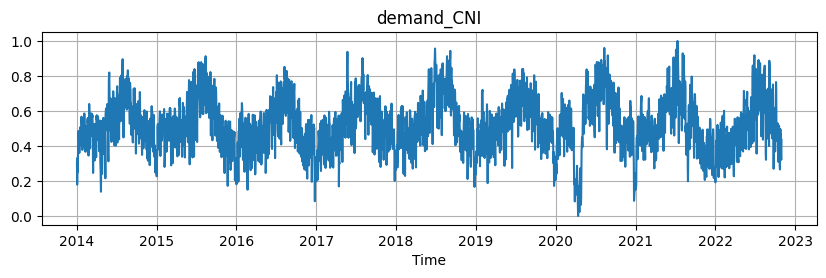

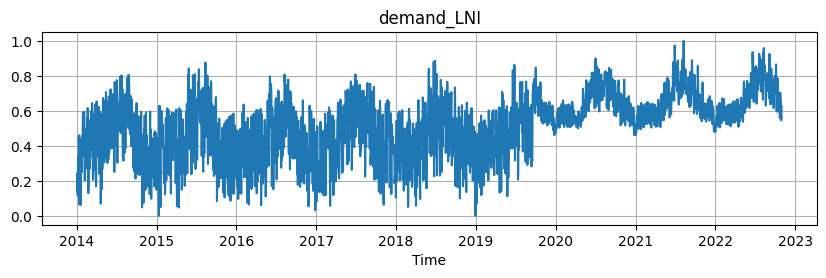

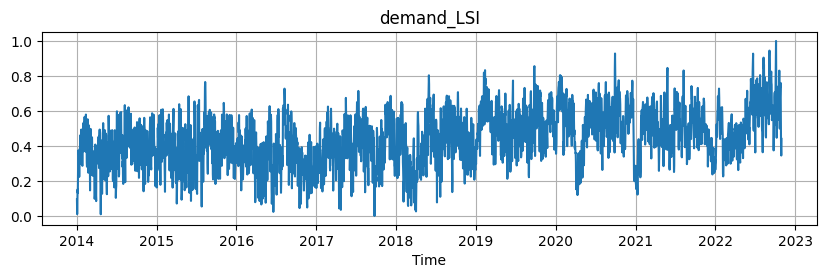

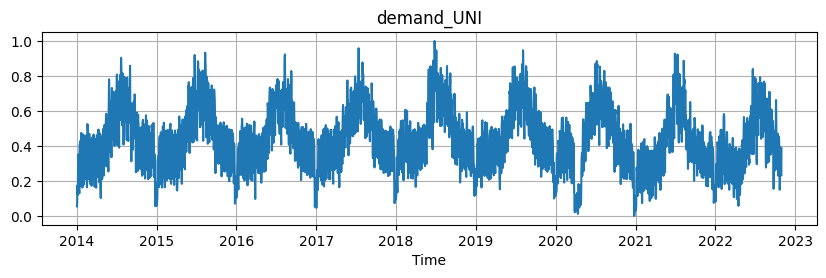

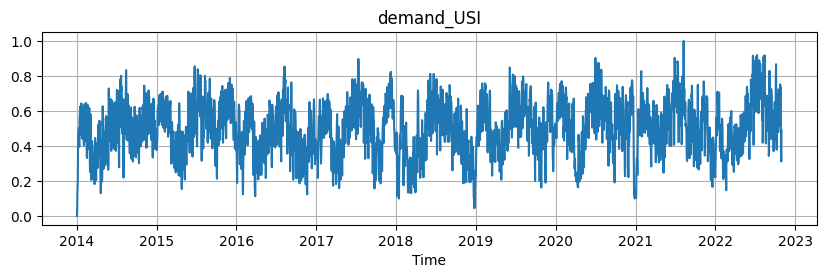

In [103]:
for column in demand.columns:
    plt.figure(figsize=(10, 2.5))  
    plt.plot(demand[column])
    plt.title(f'{column}')
    plt.xlabel('Time')
    plt.grid(True)
    plt.show()

## Forward prices

In [8]:
forward_prices 

date  ben_all_mat  ben_long_mat  ben_short_mat  ben_year+1  \
0     2014-01-01      69.0706       72.9083        59.8600     67.8250   
1     2014-01-02      69.0706       72.9083        59.8600     67.8250   
2     2014-01-03      71.6375       72.9083        67.8250     73.9500   
3     2014-01-04      71.6375       72.9083        67.8250     73.9500   
4     2014-01-05      71.6375       72.9083        67.8250     73.9500   
...          ...          ...           ...            ...         ...   
3221  2022-10-27     149.2529      143.4385       168.1500    178.8750   
3222  2022-10-28     152.9853      147.2923       171.4875    181.7125   
3223  2022-10-29     152.9853      147.2923       171.4875    181.7125   
3224  2022-10-30     152.9853      147.2923       171.4875    181.7125   
3225  2022-10-31     149.1353      144.1000       165.5000    177.7875   

      ben_year+2  ben_year+3  ota_all_mat  ota_long_mat  ota_short_mat  \
0        73.9500     72.8125      72.9412       75.3792        67.0900   
1        73.9500     72.8125      72.9412       75.3792        67.0900   
2        72.8125     71.9625      74.6094       75.3792        72.3000   
3        72.8125     71.9625      74.6094       75.3792        72.3000   
4        72.8125     71.9625      74.6094       75.3792        72.3000   
...          ...         ...          ...           ...            ...   
3221    165.6125    133.6000     189.9912      184.8423       206.7250   
3222    168.6750    139.2375     192.0676      188.1615       204.7625   
3223    168.6750    139.2375     192.0676      188.1615       204.7625   
3224    168.6750    139.2375     192.0676      188.1615       204.7625   
3225    165.1375    134.6375     188.8853      185.8423       198.7750   

      ota_year+1  ota_year+2  ota_year+3  
0        72.3000     75.7625     75.6750  
1        72.3000     75.7625     75.6750  
2        75.7625     75.6750     74.7000  
3        75.7625     75.6750     74.7000  
4        75.7625     75.6750     74.7000  
...          ...         ...         ...  
3221    220.8250    202.4125    179.3500  
3222    218.2625    203.0875    184.8125  
3223    218.2625    203.0875    184.8125  
3224    218.2625    203.0875    184.8125  
3225    213.9750    198.8750    181.9125  

[3226 rows x 13 columns]

In [9]:
forward_prices['date'] = pd.to_datetime(forward_prices['date'])
forward_prices.set_index('date', inplace=True)

Forward Prices - Box–Cox + Min-Max

In [10]:
for column in forward_prices.columns:
    pt = PowerTransformer(method='box-cox')
    forward_prices[column] = pt.fit_transform(forward_prices[[column]])

for column in forward_prices.columns:
    scaler = MinMaxScaler()
    forward_prices[column] = scaler.fit_transform(forward_prices[[column]])

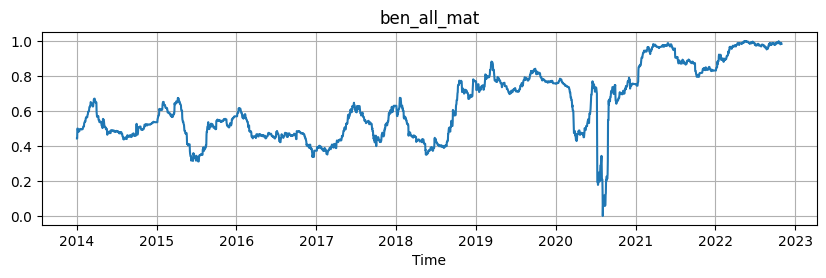

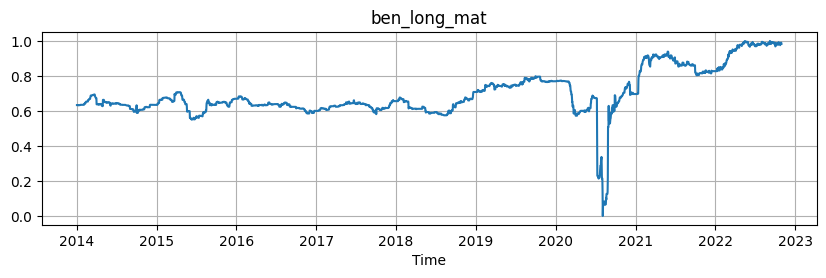

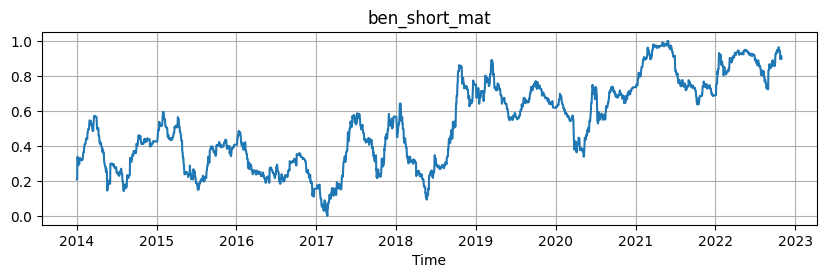

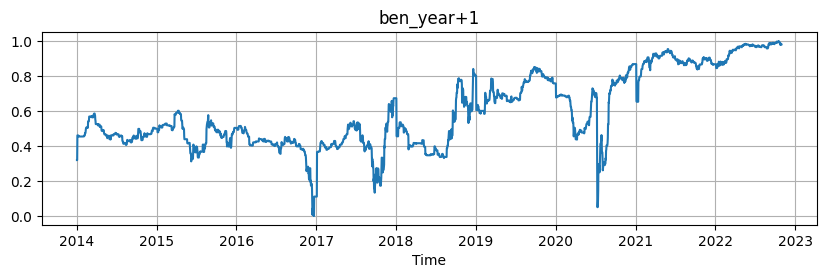

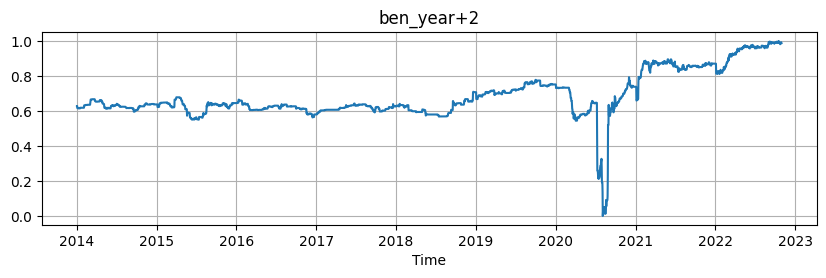

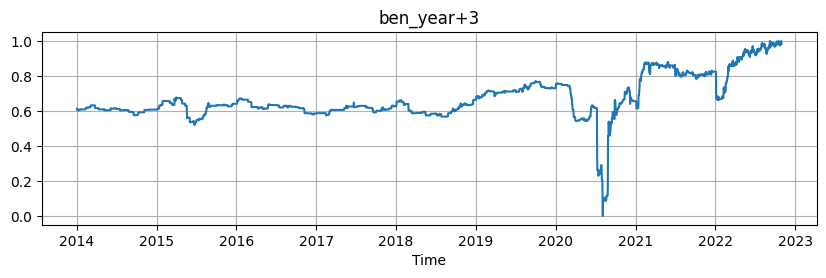

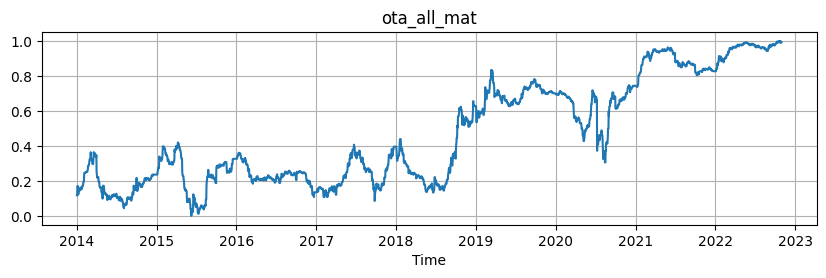

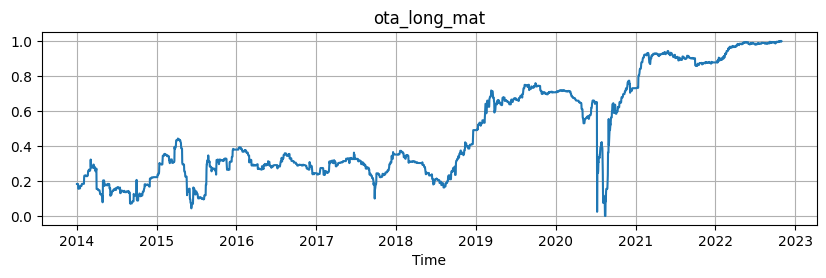

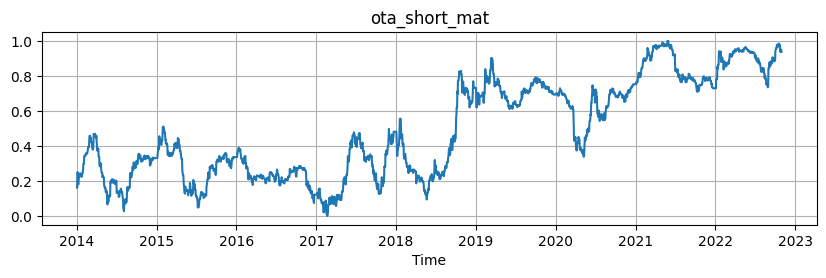

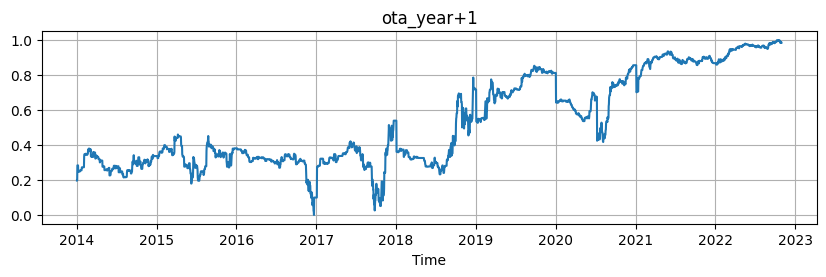

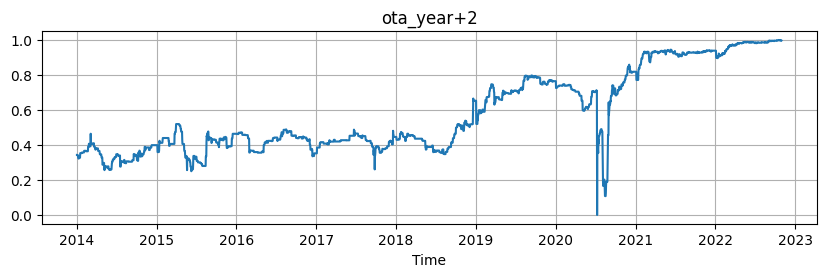

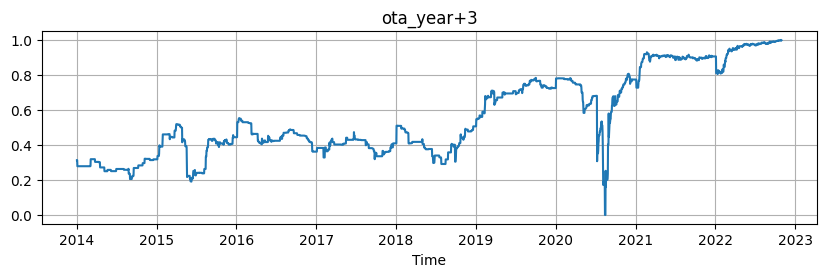

In [104]:
for column in forward_prices.columns:
    plt.figure(figsize=(10, 2.5))  
    plt.plot(forward_prices[column])
    plt.title(f'{column}')
    plt.xlabel('Time')
    plt.grid(True)
    plt.show()

## Reserve Prices

In [11]:
reserve_prices

Period start  FIR_NI  FIR_SI  SIR_NI  SIR_SI
0      2014-01-01    2.39    0.04    0.61    0.04
1      2014-01-02    1.81    0.04    0.68    0.04
2      2014-01-03    2.41    0.04    0.64    0.04
3      2014-01-04    3.96    0.03    0.51    0.03
4      2014-01-05    0.20    0.04    0.01    0.04
...           ...     ...     ...     ...     ...
3221   2022-10-27    0.03    0.02    0.06    0.05
3222   2022-10-28    0.10    0.05    0.17    0.09
3223   2022-10-29    0.04    0.03    0.03    0.03
3224   2022-10-30    0.05    0.02    0.03    0.03
3225   2022-10-31    3.99    0.01    3.19    0.02

[3226 rows x 5 columns]

In [12]:
reserve_prices['date'] = pd.to_datetime(reserve_prices['Period start'])
reserve_prices = reserve_prices.drop('Period start' , axis = 1)
reserve_prices.set_index('date', inplace=True)

In [13]:
for column in reserve_prices.columns:
    pt = PowerTransformer(method='yeo-johnson')
    reserve_prices[column] = pt.fit_transform(reserve_prices[[column]])

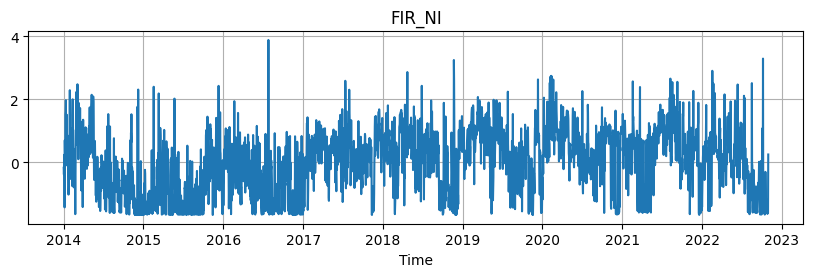

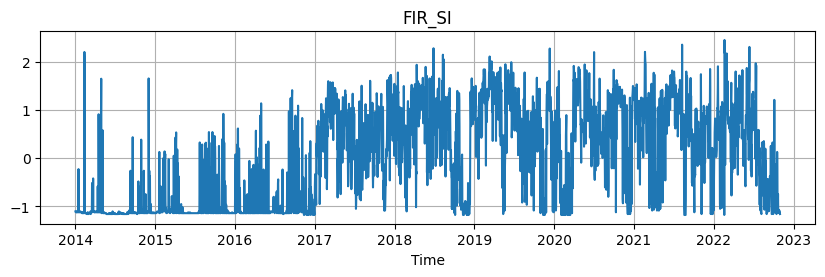

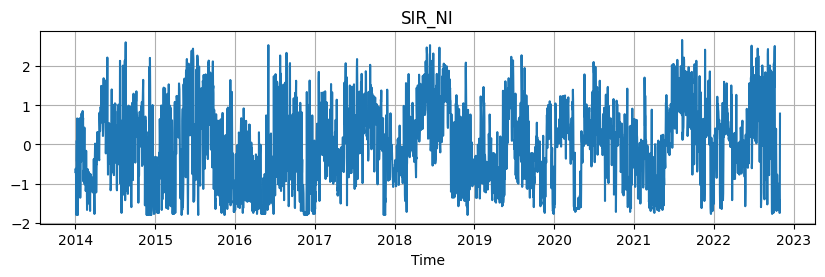

In [ ]:
for column in reserve_prices.columns:
    plt.figure(figsize=(10, 2.5))  
    plt.plot(reserve_prices[column])
    plt.title(f'{column}')
    plt.xlabel('Time')
    plt.grid(True)
    plt.show()

#### Much of the industrial demand for electricity is present in the CNI, whereas the LSI hosts a large amount of generation capacity.

#### So we are going to study only these two regions.

## Weather Data

In [14]:
weather_data

datetime  specific_windspeed  specific_winddir  specific_precip  \
0     2014-01-01             34.5125         -0.307468         6.247771   
1     2014-01-02             39.8250         -0.219962         3.768686   
2     2014-01-03             57.8250          0.055691         4.207571   
3     2014-01-04             39.4375          0.310494         0.838857   
4     2014-01-05             54.1875         -0.361846         7.041486   
...          ...                 ...               ...              ...   
3221  2022-10-27             27.5375         -0.258784         2.870143   
3222  2022-10-28             24.2125         -0.161634         3.398400   
3223  2022-10-29             34.6875          0.179764         6.280686   
3224  2022-10-30             24.6125          0.150354        19.201543   
3225  2022-10-31             26.4000          0.105015         2.596257   

      specific_precipcover   uni_temp    uni_dew  uni_humidity  uni_precip  \
0                27.976571  18.333333  14.066667     76.633333    2.266667   
1                29.882000  19.100000  14.300000     74.400000    0.000000   
2                25.596571  20.166667  16.733333     81.500000    0.100000   
3                 8.930286  21.233333  18.233333     83.700000    0.266667   
4                24.166286  20.600000  17.700000     84.033333    2.100000   
...                    ...        ...        ...           ...         ...   
3221              5.714286  15.533333  11.200000     77.266667    0.000000   
3222              8.096000  17.666667  15.333333     86.766667    5.333333   
3223             13.929143  18.800000  17.000000     89.700000    7.200000   
3224             17.262857  17.833333  17.033333     95.066667   63.800000   
3225             12.976286  17.700000  15.666667     88.566667    0.133333   

      uni_precipcover  ...  usi_solarenergy  lsi_temp  lsi_dew  lsi_humidity  \
0           38.886667  ...        16.985714   11.0125   7.4625       79.4625   
1            0.000000  ...        21.428571   12.8125   8.7000       77.6750   
2            4.166667  ...        27.771429   13.5875   8.6125       74.3375   
3            9.723333  ...        23.242857   13.1500   7.8375       72.3875   
4           30.556667  ...        29.214286   12.8000   8.0625       75.4875   
...               ...  ...              ...       ...      ...           ...   
3221         0.000000  ...        15.414286   10.7250   8.8625       89.0000   
3222         6.946667  ...         7.042857   13.7125  11.2000       85.9000   
3223         9.723333  ...         5.642857   14.9375  12.7500       87.7500   
3224        20.833333  ...        19.228571   14.2250   9.7875       77.4125   
3225         2.780000  ...        21.142857   13.1875   8.9500       77.4125   

      lsi_precip  lsi_precipcover  lsi_windspeed  lsi_winddir  lsi_cloudcover  \
0      10.462500         23.95875        20.5375    -0.029480         81.0625   
1      10.212500         41.66750        41.3625     0.096690         71.7500   
2      12.500000         12.50125        44.0875     0.204932         43.4250   
3       1.412500         13.02125        34.0625     0.234499         40.7375   
4       9.537500         18.22625        41.8375    -0.128641         30.0875   
...          ...              ...            ...          ...             ...   
3221    9.157375         11.45875        18.4875    -0.116469         99.9625   
3222    9.099000         13.02250        22.4875     0.335919         93.6125   
3223   15.428625         12.50125        19.5500    -0.343385         84.3375   
3224   14.271375         12.50000        31.2625    -0.002706         52.4625   
3225    1.568750          4.68750        19.2125     0.468084         49.0625   

      lsi_solarenergy  
0             16.2250  
1             18.7625  
2             23.4875  
3             26.1500  
4             24.7125  
...               ...  
3221           2.2750  
3222          11.7625  
3223          15.075

In [15]:
weather_data.columns

Index(['datetime', 'specific_windspeed', 'specific_winddir', 'specific_precip',
       'specific_precipcover', 'uni_temp', 'uni_dew', 'uni_humidity',
       'uni_precip', 'uni_precipcover', 'uni_windspeed', 'uni_winddir',
       'uni_cloudcover', 'uni_solarenergy', 'cni_temp', 'cni_dew',
       'cni_humidity', 'cni_precip', 'cni_precipcover', 'cni_windspeed',
       'cni_winddir', 'cni_cloudcover', 'cni_solarenergy', 'lni_temp',
       'lni_dew', 'lni_humidity', 'lni_precip', 'lni_precipcover',
       'lni_windspeed', 'lni_winddir', 'lni_cloudcover', 'lni_solarenergy',
       'usi_temp', 'usi_dew', 'usi_humidity', 'usi_precip', 'usi_precipcover',
       'usi_windspeed', 'usi_winddir', 'usi_cloudcover', 'usi_solarenergy',
       'lsi_temp', 'lsi_dew', 'lsi_humidity', 'lsi_precip', 'lsi_precipcover',
       'lsi_windspeed', 'lsi_winddir', 'lsi_cloudcover', 'lsi_solarenergy'],
      dtype='object')

In [16]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data.set_index('datetime', inplace=True)

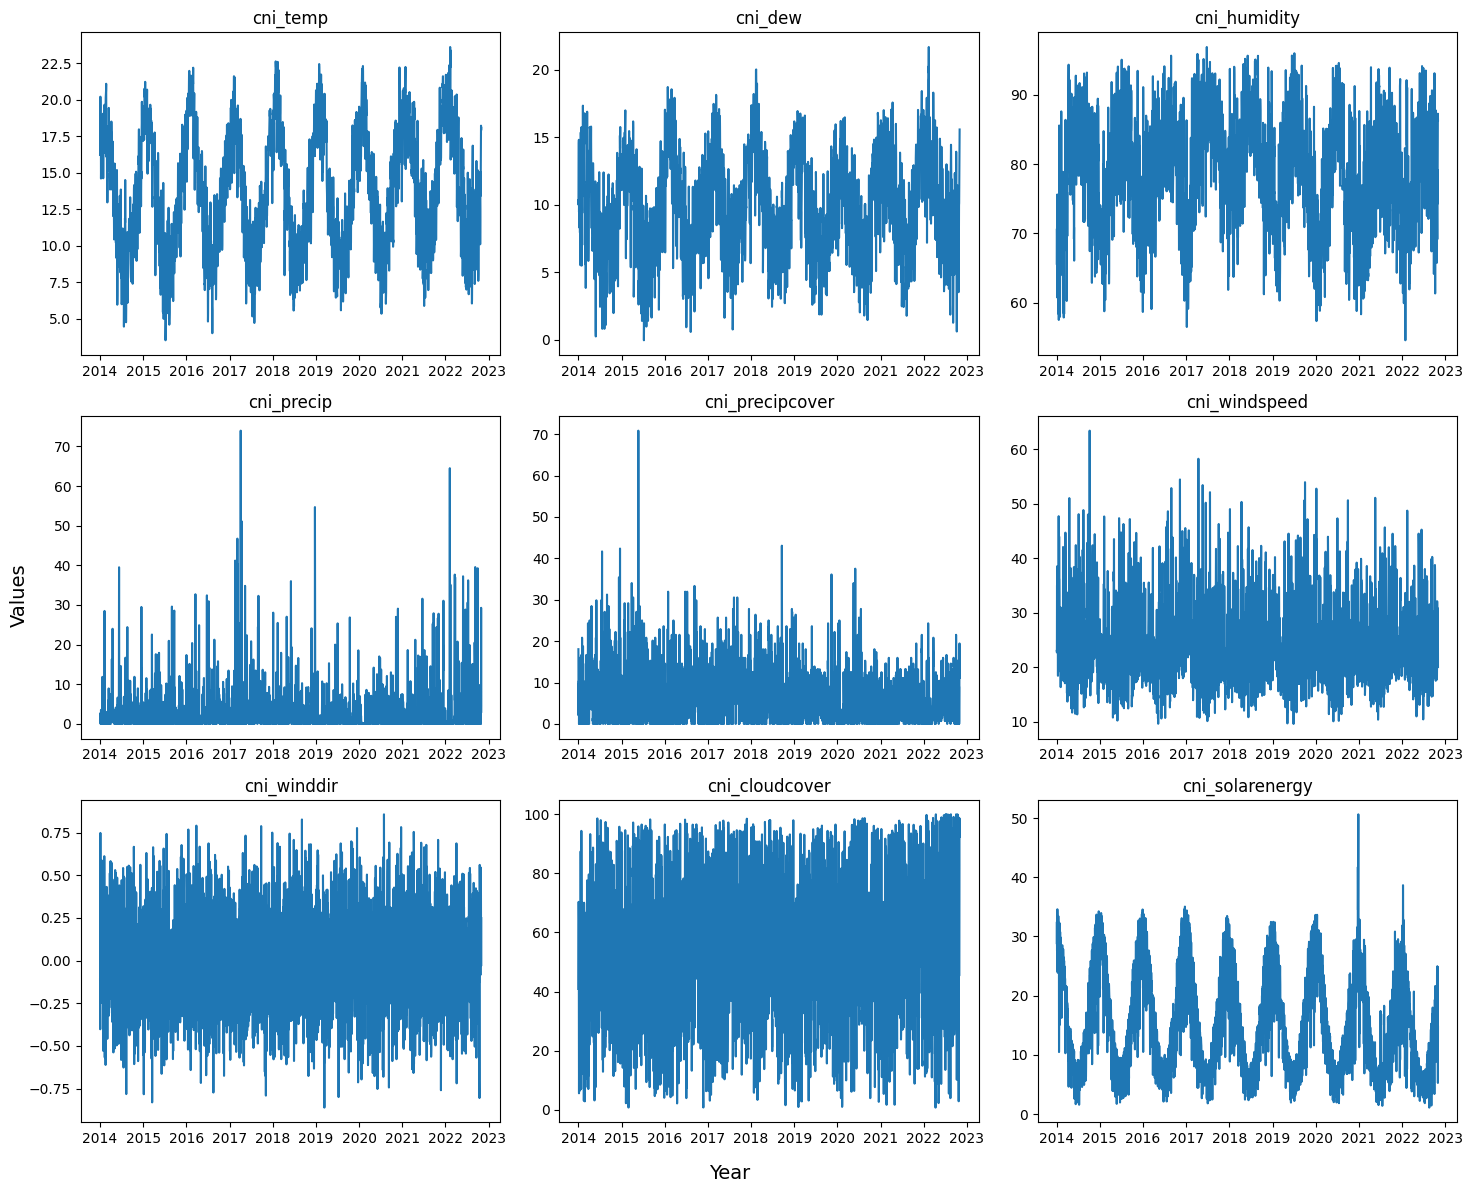

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns of subplots

# List of column names
columns = ['cni_temp', 'cni_dew', 'cni_humidity', 'cni_precip', 'cni_precipcover', 'cni_windspeed', 'cni_winddir', 'cni_cloudcover', 'cni_solarenergy']

# Plot each column in a subplot
for i, column in enumerate(columns):
    row = i // 3  
    col = i % 3  
    axs[row, col].plot(weather_data.index, weather_data[column])
    axs[row, col].set_title(column)

fig.supxlabel('Year', fontsize=14)
fig.supylabel('Values', fontsize=14)

plt.tight_layout() 
plt.show()

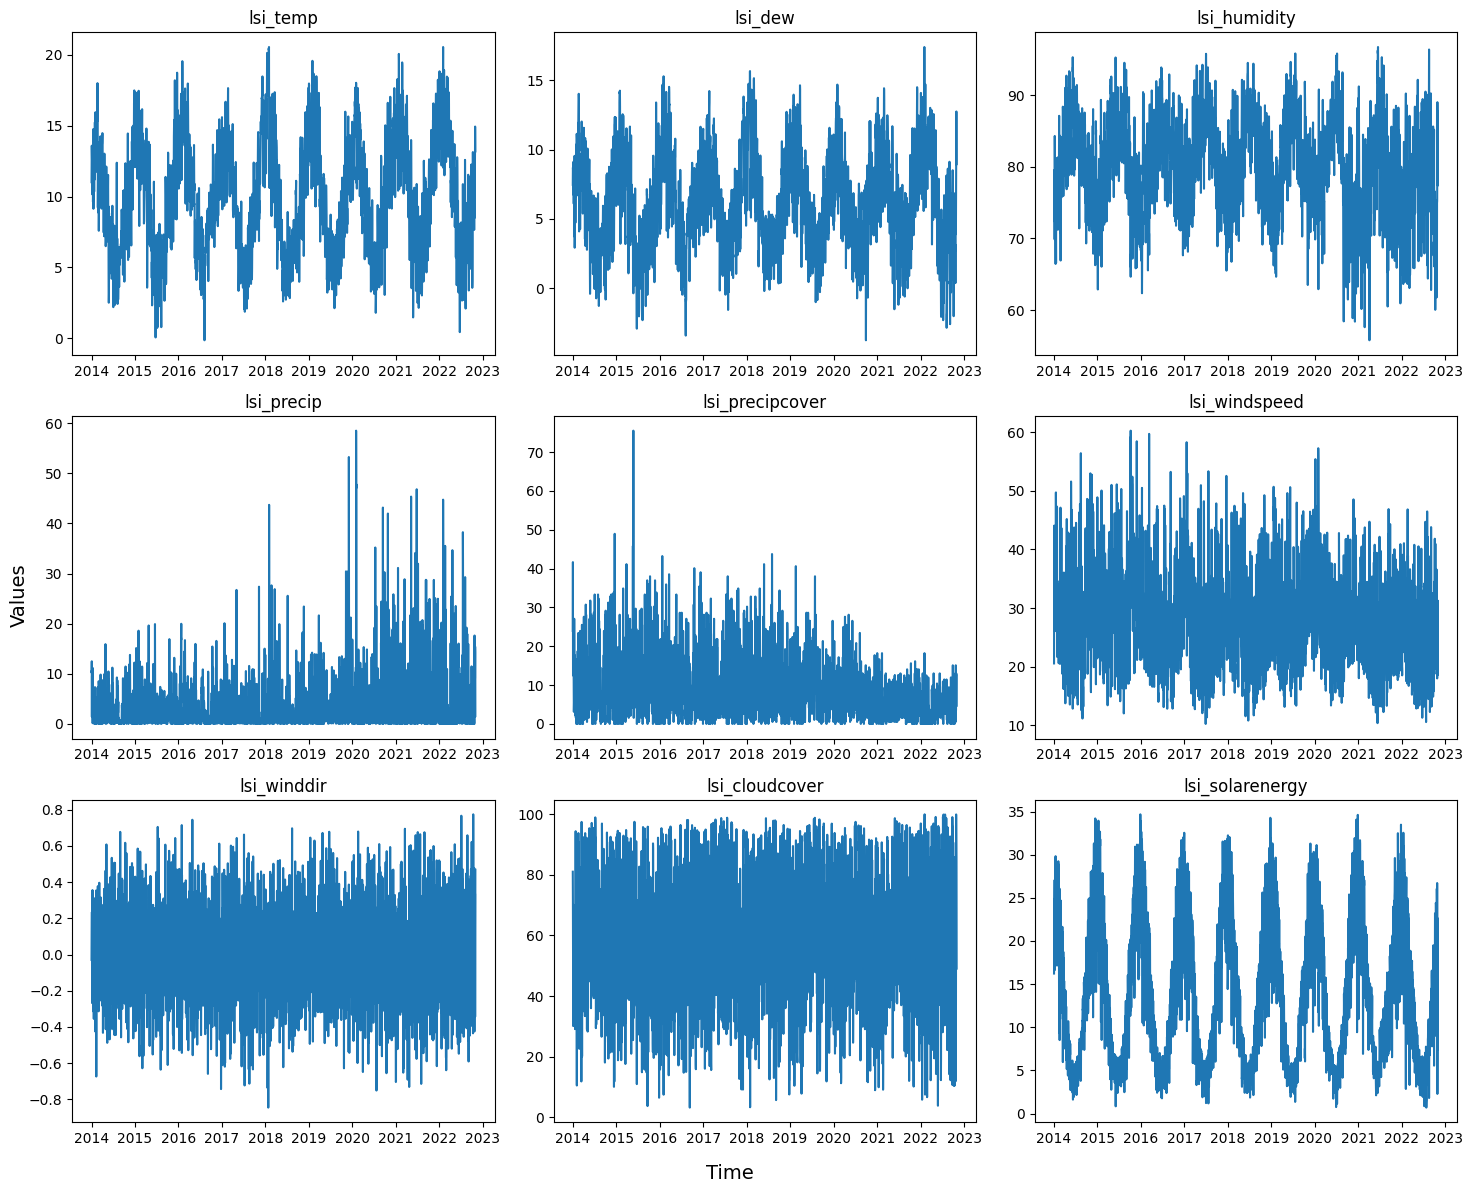

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns of subplots

columns = ['lsi_temp', 'lsi_dew', 'lsi_humidity', 'lsi_precip', 'lsi_precipcover', 'lsi_windspeed', 'lsi_winddir', 'lsi_cloudcover', 'lsi_solarenergy']

for i, column in enumerate(columns):
    row = i // 3 
    col = i % 3  
    axs[row, col].plot(weather_data.index, weather_data[column])
    axs[row, col].set_title(column)

fig.supxlabel('Time', fontsize=14)
fig.supylabel('Values', fontsize=14)

plt.tight_layout()  # Ensure that subplots do not overlap
plt.show()

In [19]:
pt = PowerTransformer(method='yeo-johnson')
weather_data['cni_precip'] = pt.fit_transform(weather_data[['cni_precip']])
weather_data['lsi_precip'] = pt.fit_transform(weather_data[['lsi_precip']])
weather_data['cni_winddir'] = np.sin(weather_data['cni_winddir'])
weather_data['lsi_winddir'] = np.sin(weather_data['lsi_winddir'])

columns = ['cni_temp', 'cni_dew', 'cni_humidity', 'cni_precip', 'cni_precipcover', 'cni_windspeed', 'cni_winddir', 'cni_cloudcover', 'cni_solarenergy' , 'lsi_temp', 'lsi_dew', 'lsi_humidity', 'lsi_precip', 'lsi_precipcover', 'lsi_windspeed', 'lsi_winddir', 'lsi_cloudcover', 'lsi_solarenergy']

for column in columns:
    scaler = MinMaxScaler()
    weather_data[column] = scaler.fit_transform(weather_data[[column]])

## HVDC

In [20]:
hvdc

date  Energy transfer (GWh)
0     2014-01-01                 13.495
1     2014-01-02                  9.671
2     2014-01-03                 10.457
3     2014-01-04                 12.030
4     2014-01-05                  9.058
...          ...                    ...
3221  2022-10-27                  5.885
3222  2022-10-28                  5.898
3223  2022-10-29                  2.746
3224  2022-10-30                  5.082
3225  2022-10-31                 12.475

[3226 rows x 2 columns]

In [21]:
hvdc['date'] = pd.to_datetime(hvdc['date'])
hvdc.set_index('date', inplace=True)

In [22]:
scaler = MinMaxScaler()

column_to_scale = 'Energy transfer (GWh)'  

data_to_scale = hvdc[[column_to_scale]].values.reshape(-1, 1)

data_to_scale = scaler.fit_transform(data_to_scale)

hvdc[column_to_scale] = data_to_scale

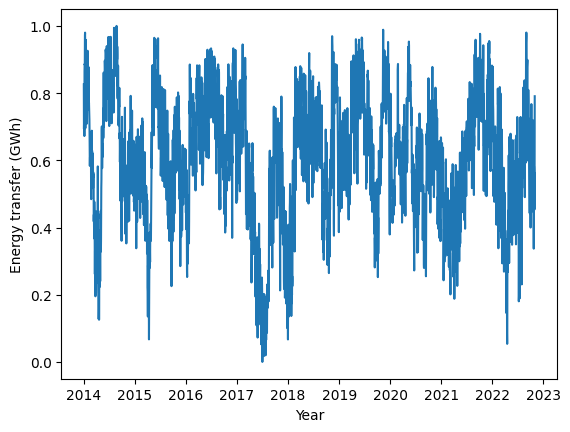

In [23]:
plt.plot(hvdc['Energy transfer (GWh)'])
plt.xlabel('Year')
plt.ylabel('Energy transfer (GWh)')
plt.show()

## Generation 

In [24]:
generation

Trading_date     Coal  Diesel         Gas           Geo         Hydro  \
0      2014-01-01    0.000     0.0  8302.77898  17351.388554  56841.556049   
1      2014-01-02    0.000     0.0  8531.53690  17302.711343  53141.041430   
2      2014-01-03    0.000     0.0  8624.36814  17977.437652  58433.729806   
3      2014-01-04    0.000     0.0  8574.21610  18770.175598  59370.971101   
4      2014-01-05    0.000     0.0  8288.82292  18109.475853  57000.057034   
...           ...      ...     ...         ...           ...           ...   
3221   2022-10-27  623.276     0.0  7289.97000  21197.454000  74378.332000   
3222   2022-10-28    0.000     0.0  7880.23200  21394.941000  71843.617000   
3223   2022-10-29    0.000     0.0  6889.25600  21150.664000  58526.718000   
3224   2022-10-30    0.000     0.0  6370.67300  21251.594000  62450.286000   
3225   2022-10-31  346.932     0.0  6075.21000  21093.899000  75571.571000   

              Wind     Wood  
0      4869.557152  841.273  
1      7678.994002  750.357  
2      8006.778937  800.113  
3      5604.824022  743.592  
4      8595.735891  815.482  
...            ...      ...  
3221   8559.545000  612.608  
3222   7820.667000  764.105  
3223  12274.682000  837.730  
3224   6340.196000  814.459  
3225   2816.617000  783.743  

[3226 rows x 8 columns]

In [25]:
generation['date'] = pd.to_datetime(generation['Trading_date'])
generation = generation.drop('Trading_date' , axis = 1)
generation.set_index('date', inplace=True)

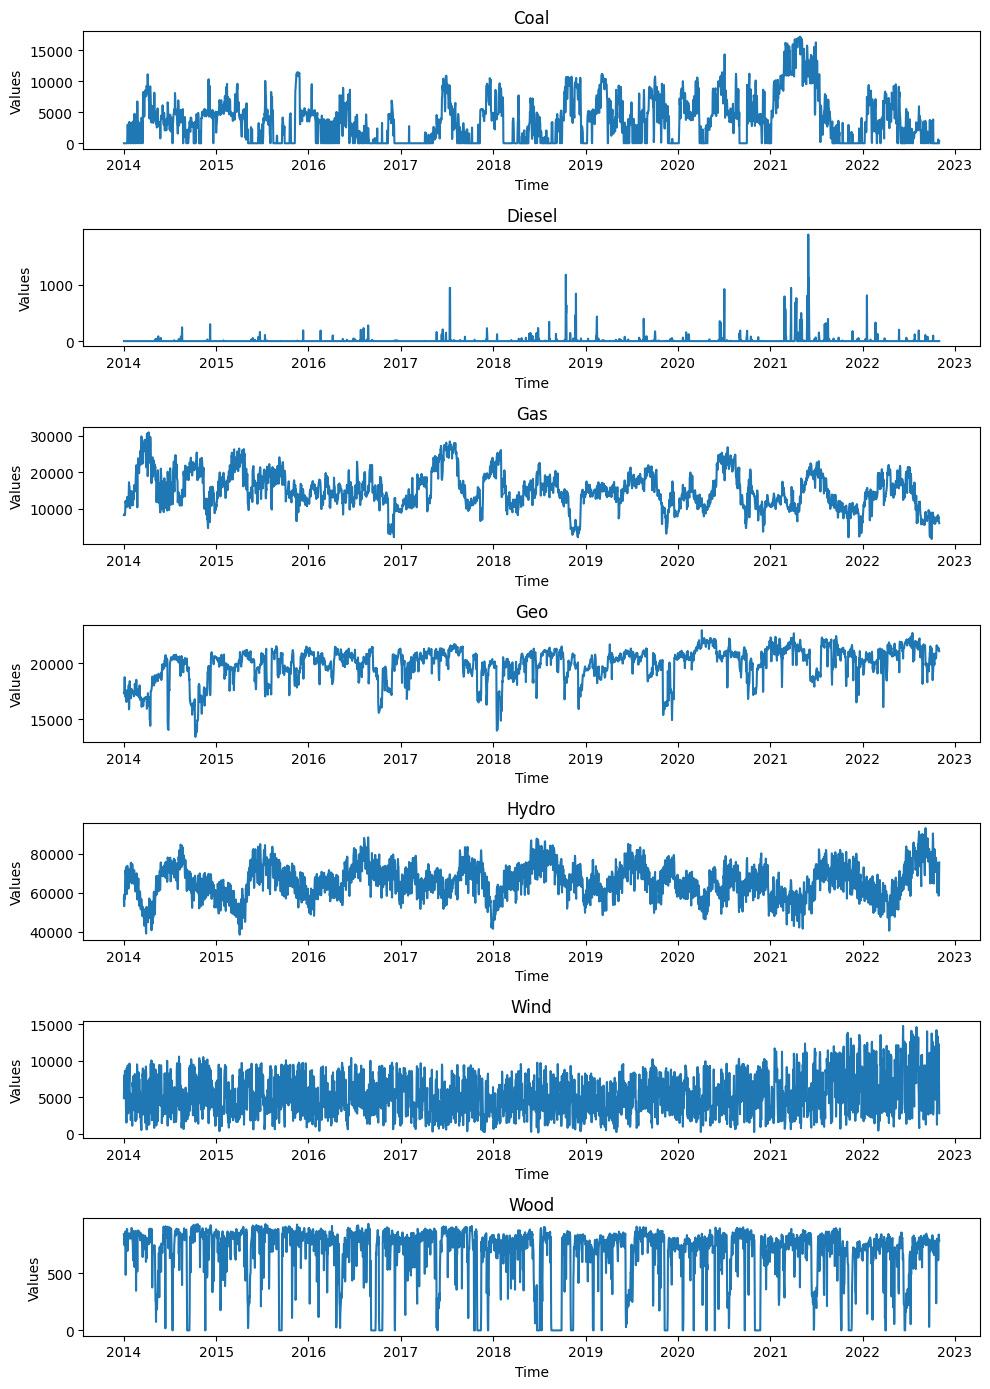

In [26]:
columns_to_plot = ['Coal', 'Diesel', 'Gas', 'Geo', 'Hydro', 'Wind', 'Wood']

fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 2 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    axs[i].plot(generation.index, generation[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

1. Coal Generation - Yeo-Johnson + Min-Max
2. Gas Generation - Min-Max
3. Geothermal Generation - Min-Max
4. Diesel Generation - Yeo-Johnson + Min-Max
5. Wood Generation - Min-Max
6. Hydro Generation - Min-Max
7. Wind Generation - Min-Max

In [27]:
yeo_johnson_cols = ['Coal', 'Diesel']
min_max_cols = ['Coal', 'Diesel', 'Gas', 'Geo', 'Hydro', 'Wind', 'Wood']

for column in yeo_johnson_cols:
    pt = PowerTransformer(method='yeo-johnson')
    generation[column] = pt.fit_transform(generation[[column]])

for column in min_max_cols:
    scaler = MinMaxScaler()
    generation[column] = scaler.fit_transform(generation[[column]])

After Transformation

## Price

In [29]:
price

Date  price_cni  price_lni  price_lsi   price_uni   price_usi
0     2014-01-01  22.191539  21.291605  17.216010   23.231868   18.038923
1     2014-01-02  16.815890  16.085348  14.157682   17.400201   15.235262
2     2014-01-03  29.208112  28.189567  23.246465   30.546458   26.991604
3     2014-01-04  32.475897  31.225131  23.981962   33.631261   26.241016
4     2014-01-05  29.742636  28.529138  25.177724   30.467888   27.215722
...          ...        ...        ...        ...         ...         ...
3221  2022-10-27  93.929910  94.205018  92.315211  100.910547  101.515392
3222  2022-10-28  95.039893  94.999743  92.986806  101.789453  101.327226
3223  2022-10-29  39.308295  38.387741  37.670048   41.470847   40.549783
3224  2022-10-30  40.475810  40.563311  38.831015   42.919993   41.733687
3225  2022-10-31  41.135762  39.934536  33.765395   43.950672   36.374080

[3226 rows x 6 columns]

Apply Box Cox + Min Max transformation

In [30]:
price['date'] = pd.to_datetime(price['Date'])
price = price.drop('Date' , axis = 1)
price.set_index('date', inplace=True)

In [31]:
for column in price.columns:
    pt = PowerTransformer(method='yeo-johnson')
    price[column] = pt.fit_transform(price[[column]])

for column in price.columns:
    scaler = MinMaxScaler()
    price[column] = scaler.fit_transform(price[[column]])

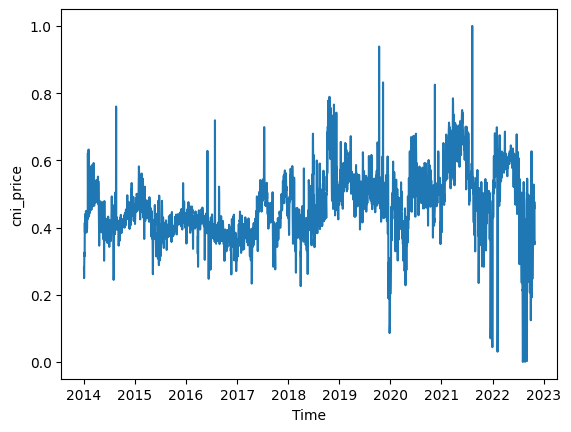

In [32]:
plt.plot(price['price_cni'])
plt.xlabel('Time')
plt.ylabel('cni_price')
plt.show()

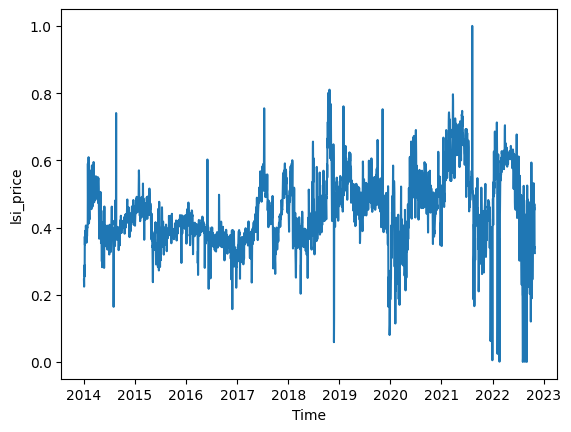

In [33]:
plt.plot(price['price_lsi'])
plt.xlabel('Time')
plt.ylabel('lsi_price')
plt.show()

## Holidays 

These are the public holidays in NewZealand
1. New Year's Day (January 1st or January 2nd if January 1st falls on a weekend)
2. Day after New Year's Day (January 2nd or January 3rd if January 1st falls on a weekend)
3. Waitangi Day (February 6th)
4. Anzac Day (April 25th)
5. Queen's Birthday (first Monday in June)
6. Labour Day (fourth Monday in October)
7. Christmas Day (December 25th)
8. Boxing Day (December 26th)

In [34]:
holiday_dates = [
    '2014-01-01', '2014-01-02','2014-02-06','2014-04-25','2014-06-02','2014-10-27','2014-12-25', '2014-12-26','2015-01-01', '2015-01-02',
    '2015-02-06','2015-04-25','2015-06-01','2015-10-26','2015-12-25', '2015-12-26','2016-01-01', '2016-01-02','2016-02-06','2016-04-25',
    '2016-06-06', '2016-10-24', '2016-12-25', '2016-12-26','2017-01-02','2017-02-06','2017-04-25',
    '2017-06-05','2017-10-23','2017-12-25', '2017-12-26','2018-01-01', '2018-01-02','2018-02-06','2018-04-25','2018-06-04','2018-10-22','2018-12-25', '2018-12-26','2019-01-01', '2019-01-02', '2019-02-06','2019-04-25','2019-06-03',
    '2019-10-28','2019-12-25', '2019-12-26','2020-01-01', '2020-01-02','2020-02-06','2020-04-25','2020-06-01','2020-10-26','2020-12-25', '2020-12-26', '2021-01-01', '2021-01-02', '2021-02-06','2021-04-25','2021-06-07','2021-10-25',
    '2021-12-25', '2021-12-26','2022-01-01', '2022-01-02','2022-02-06','2022-04-25','2022-06-06','2022-10-24',
]

## Dataset preparation for cni and lsi 

In [35]:
# CNI 
cni_demand = demand['demand_CNI']
cni_reserve_prices = reserve_prices[['FIR_NI', 'SIR_NI']]
cni_weather = weather_data[['cni_temp', 'cni_dew', 'cni_humidity', 'cni_precip', 'cni_precipcover', 'cni_windspeed', 'cni_winddir', 'cni_cloudcover', 'cni_solarenergy']]
cni_price = price['price_cni']
cni = pd.concat([cni_demand, generation, forward_prices, cni_reserve_prices, hvdc, cni_weather , cni_price], axis=1)

# LSI
lsi_demand = demand['demand_LSI']
lsi_reserve_prices = reserve_prices[['FIR_SI', 'SIR_SI']]
lsi_price = price['price_lsi']
lsi_weather = weather_data[['lsi_temp', 'lsi_dew', 'lsi_humidity', 'lsi_precip', 'lsi_precipcover', 'lsi_windspeed', 'lsi_winddir', 'lsi_cloudcover', 'lsi_solarenergy']]

lsi = pd.concat([lsi_demand, generation, forward_prices, lsi_reserve_prices, hvdc, lsi_weather , lsi_price], axis=1)

In [36]:
import warnings 
warnings.filterwarnings("ignore")
lagged_days = [1,2,3,7,14]
for column in cni.columns :
    for lag in lagged_days :
        cni[f'{column}_Lagged_{lag}'] = cni[column].shift(lag)
        
lagged_days = [1,2,3,7,14]
for column in lsi.columns :
    for lag in lagged_days :
        lsi[f'{column}_Lagged_{lag}'] = lsi[column].shift(lag)

In [37]:
cni['DayOfWeek'] = cni.index.dayofweek
lsi['DayOfWeek'] = lsi.index.dayofweek
cni['isholiday'] = (cni.index.strftime('%Y-%m-%d').isin(holiday_dates) | (cni.index.dayofweek >= 5)).astype(int)
lsi['isholiday'] = (lsi.index.strftime('%Y-%m-%d').isin(holiday_dates) | (lsi.index.dayofweek >= 5)).astype(int)

In [38]:
cni = cni.fillna(0)
lsi = lsi.fillna(0)

In [39]:
cni

demand_CNI      Coal  Diesel       Gas       Geo     Hydro  \
2014-01-01    0.302819  0.000000     0.0  0.224259  0.410788  0.335120   
2014-01-02    0.179429  0.000000     0.0  0.232092  0.405681  0.267448   
2014-01-03    0.251668  0.000000     0.0  0.235271  0.476472  0.364237   
2014-01-04    0.334026  0.000000     0.0  0.233554  0.559644  0.381376   
2014-01-05    0.251063  0.000000     0.0  0.223781  0.490325  0.338019   
...                ...       ...     ...       ...       ...       ...   
2022-10-27    0.461345  0.376640     0.0  0.189577  0.814309  0.655820   
2022-10-28    0.465630  0.000000     0.0  0.209789  0.835029  0.609467   
2022-10-29    0.346901  0.000000     0.0  0.175855  0.809400  0.365937   
2022-10-30    0.321258  0.000000     0.0  0.158097  0.819990  0.437689   
2022-10-31    0.435464  0.311837     0.0  0.147979  0.803445  0.677641   

                Wind      Wood  ben_all_mat  ben_long_mat  ...  \
2014-01-01  0.321870  0.903490     0.442928      0.633705  ...   
2014-01-02  0.514957  0.805850     0.442928      0.633705  ...   
2014-01-03  0.537485  0.859286     0.499370      0.633705  ...   
2014-01-04  0.372403  0.798585     0.499370      0.633705  ...   
2014-01-05  0.577962  0.875792     0.499370      0.633705  ...   
...              ...       ...          ...           ...  ...   
2022-10-27  0.575475  0.657914     0.983604      0.982386  ...   
2022-10-28  0.524694  0.820615     0.988872      0.990059  ...   
2022-10-29  0.830809  0.899685     0.988872      0.990059  ...   
2022-10-30  0.422944  0.874693     0.988872      0.990059  ...   
2022-10-31  0.180776  0.841705     0.983430      0.983740  ...   

            cni_solarenergy_Lagged_3  cni_solarenergy_Lagged_7  \
2014-01-01                  0.000000                  0.000000   
2014-01-02                  0.000000                  0.000000   
2014-01-03                  0.000000                  0.000000   
2014-01-04                  0.560902                  0.000000   
2014-01-05                  0.633244                  0.000000   
...                              ...                       ...   
2022-10-27                  0.481157                  0.355316   
2022-10-28                  0.244280                  0.221736   
2022-10-29                  0.300808                  0.461642   
2022-10-30                  0.480821                  0.478802   
2022-10-31                  0.337820                  0.481157   

            cni_solarenergy_Lagged_14  price_cni_Lagged_1  price_cni_Lagged_2  \
2014-01-01                   0.000000            0.000000            0.000000   
2014-01-02                   0.000000            0.280075            0.000000   
2014-01-03                   0.000000            0.249310            0.280075   
2014-01-04                   0.000000            0.312546            0.249310   
2014-01-05                   0.000000            0.325623            0.312546   
...                               ...                 ...                 ...   
2022-10-27                   0.174293            0.454956            0.466872   
2022-10-28                   0.224092            0.474279            0.454956   
2022-10-29                   0.218371            0.476113            0.474279   
2022-10-30                   0.399394            0.349946            0.476113   
2022-10-31                   0.357335            0.353764            0.349946   

            price_cni_Lagged_3  price_cni_Lagged_7  price_cni_Lagged_14  \
2014-01-01            0.000000            0.000000             0.000000   
2014-01-02            0.000000            0.000000             0.000000   
2014-01-03            0.000000            0.000000             0.000000   
2014-01-04            0.280075            0.000000             0.000000   
2014-01-05            0.249310            0.000000             0.000000   
...                        ...                 ...                  ...   
2022-10-27            0.442605         

In [40]:
lsi

demand_LSI      Coal  Diesel       Gas       Geo     Hydro  \
2014-01-01    0.094197  0.000000     0.0  0.224259  0.410788  0.335120   
2014-01-02    0.010497  0.000000     0.0  0.232092  0.405681  0.267448   
2014-01-03    0.092556  0.000000     0.0  0.235271  0.476472  0.364237   
2014-01-04    0.151646  0.000000     0.0  0.233554  0.559644  0.381376   
2014-01-05    0.130616  0.000000     0.0  0.223781  0.490325  0.338019   
...                ...       ...     ...       ...       ...       ...   
2022-10-27    0.760432  0.376640     0.0  0.189577  0.814309  0.655820   
2022-10-28    0.576592  0.000000     0.0  0.209789  0.835029  0.609467   
2022-10-29    0.393387  0.000000     0.0  0.175855  0.809400  0.365937   
2022-10-30    0.345436  0.000000     0.0  0.158097  0.819990  0.437689   
2022-10-31    0.440788  0.311837     0.0  0.147979  0.803445  0.677641   

                Wind      Wood  ben_all_mat  ben_long_mat  ...  \
2014-01-01  0.321870  0.903490     0.442928      0.633705  ...   
2014-01-02  0.514957  0.805850     0.442928      0.633705  ...   
2014-01-03  0.537485  0.859286     0.499370      0.633705  ...   
2014-01-04  0.372403  0.798585     0.499370      0.633705  ...   
2014-01-05  0.577962  0.875792     0.499370      0.633705  ...   
...              ...       ...          ...           ...  ...   
2022-10-27  0.575475  0.657914     0.983604      0.982386  ...   
2022-10-28  0.524694  0.820615     0.988872      0.990059  ...   
2022-10-29  0.830809  0.899685     0.988872      0.990059  ...   
2022-10-30  0.422944  0.874693     0.988872      0.990059  ...   
2022-10-31  0.180776  0.841705     0.983430      0.983740  ...   

            lsi_solarenergy_Lagged_3  lsi_solarenergy_Lagged_7  \
2014-01-01                  0.000000                  0.000000   
2014-01-02                  0.000000                  0.000000   
2014-01-03                  0.000000                  0.000000   
2014-01-04                  0.457153                  0.000000   
2014-01-05                  0.531813                  0.000000   
...                              ...                       ...   
2022-10-27                  0.194189                  0.472968   
2022-10-28                  0.765723                  0.700257   
2022-10-29                  0.272527                  0.746230   
2022-10-30                  0.046708                  0.702464   
2022-10-31                  0.325855                  0.194189   

            lsi_solarenergy_Lagged_14  price_lsi_Lagged_1  price_lsi_Lagged_2  \
2014-01-01                   0.000000            0.000000            0.000000   
2014-01-02                   0.000000            0.244702            0.000000   
2014-01-03                   0.000000            0.224124            0.244702   
2014-01-04                   0.000000            0.278406            0.224124   
2014-01-05                   0.000000            0.282051            0.278406   
...                               ...                 ...                 ...   
2022-10-27                   0.563442            0.451572            0.460438   
2022-10-28                   0.698051            0.468852            0.451572   
2022-10-29                   0.692534            0.470023            0.468852   
2022-10-30                   0.537698            0.338142            0.470023   
2022-10-31                   0.502758            0.342136            0.338142   

            price_lsi_Lagged_3  price_lsi_Lagged_7  price_lsi_Lagged_14  \
2014-01-01            0.000000            0.000000             0.000000   
2014-01-02            0.000000            0.000000             0.000000   
2014-01-03            0.000000            0.000000             0.000000   
2014-01-04            0.244702            0.000000             0.000000   
2014-01-05            0.224124            0.000000             0.000000   
...                        ...                 ...                  ...   
2022-10-27            0.444963         

In [41]:
file_path1 = 'cni.csv'
cni.to_csv(file_path1)

In [42]:
file_path2 = 'lsi.csv'
lsi.to_csv(file_path2)

## Train-test split

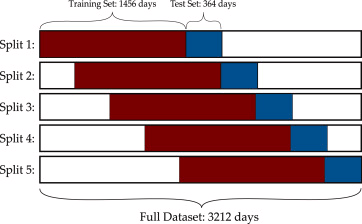

1. For time-series cross-validation, we divide the data into 5 equal-length folds to preserve the sequential nature of the data.

2. Each training set is fixed at 1456 days, followed by a test set of 364 days. In cases requiring a validation set, the first 1092 days of the training set are used as training data, and the remaining 364 days serve as the validation set for hyperparameter tuning during feature selection and machine learning model training.






In [43]:
def split(df)->(list , list):
    train = []
    test = []
    for i in range(5) :
        train_start_date = df.index.min() + pd.DateOffset(years = i)
        train_end_date = train_start_date + pd.DateOffset(years = 4)
        test_end_date = train_end_date + pd.DateOffset(years = 1)
        train_mask = (df.index >= train_start_date) & (df.index < train_end_date)
        test_mask = (df.index >= train_end_date) & (df.index <= test_end_date)
        train += [df[train_mask]]
        test += [df[test_mask]]
    return train , test 

In [44]:
cni_train , cni_test = split(cni)
lsi_train , lsi_test = split(lsi)

# Model Training

##  1. Deep Neural Network

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

def DNN(X_train, y_train, X_test, y_test, name, lr=0.001, dropout_rate=0.2, batch_normalization=True):
    input_shape = (X_train.shape[1],)
    input_layer = keras.layers.Input(shape=input_shape)
    model = keras.Sequential([input_layer])
    model.add(layers.Dense(128, activation='relu'))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(64, activation='relu'))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='linear'))  
    model.compile(optimizer=keras.optimizers.Adam(lr), loss='mean_squared_error', metrics=['accuracy'])
    
    for _ in tqdm(range(100)):
        model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=0)
    y_pred = model.predict(X_test)
        
    plt.plot(y_train.index, y_train, label='Actual', color='b')
    plt.plot(y_test.index, y_test, color='b')
    plt.plot(y_test.index, y_pred, label='Predicted', color='r')
    plt.title(f'Subset {i+1} of {name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    y_test = y_test.to_numpy()
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_test.reshape(-1,1) - y_pred.reshape(-1,1)).numpy()))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)

    return rmse



### 1.1 Lasso Feature Selection method

For each cross-validation set, we perform a grid search over the values of 
 in the range [10-4 , 10-1]
 with a step size of 10−3. 

100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


12/12 [==============================] - 0s 2ms/step


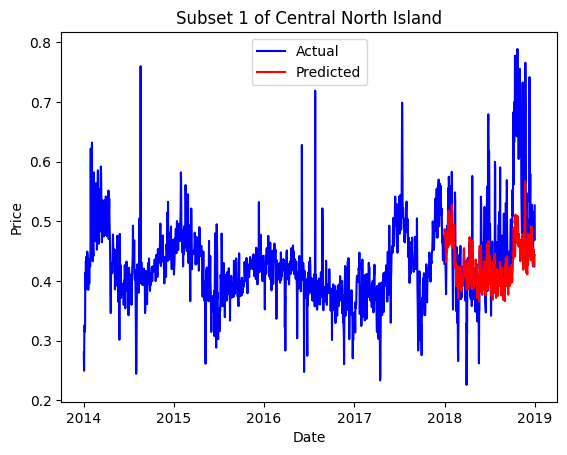

12/12 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.0000e+00
The RMSE of the subset 1 is 0.09021024538857242


100%|██████████| 100/100 [00:18<00:00,  5.41it/s]


12/12 [==============================] - 0s 2ms/step


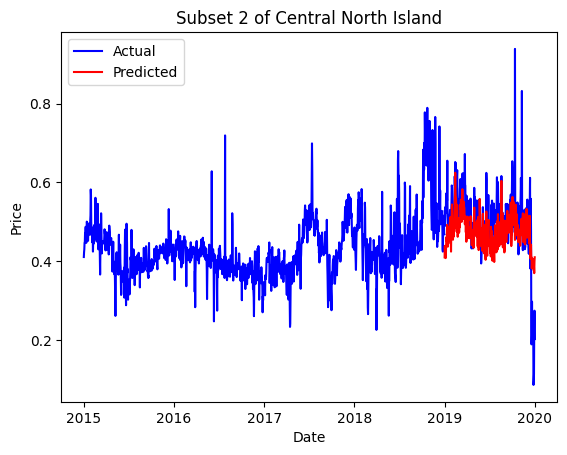

12/12 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.0000e+00
The RMSE of the subset 2 is 0.07639411890492796


100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


12/12 [==============================] - 0s 2ms/step


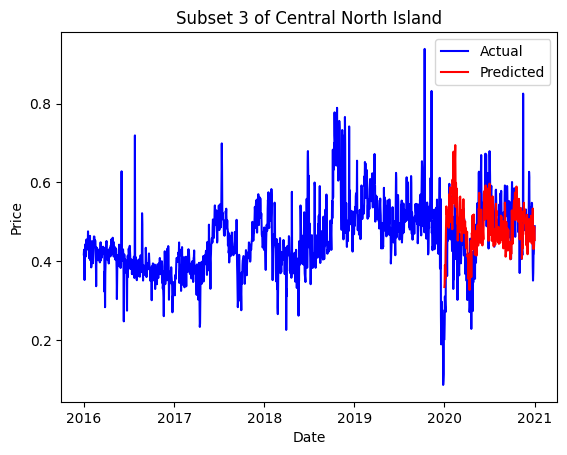

12/12 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.0000e+00
The RMSE of the subset 3 is 0.07465845196799124


100%|██████████| 100/100 [00:19<00:00,  5.26it/s]


12/12 [==============================] - 0s 2ms/step


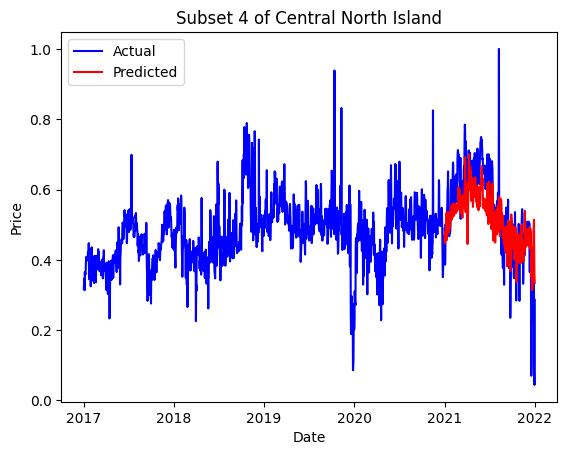

12/12 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.0027
The RMSE of the subset 4 is 0.07936659585122208


100%|██████████| 100/100 [00:18<00:00,  5.31it/s]


10/10 [==============================] - 0s 2ms/step


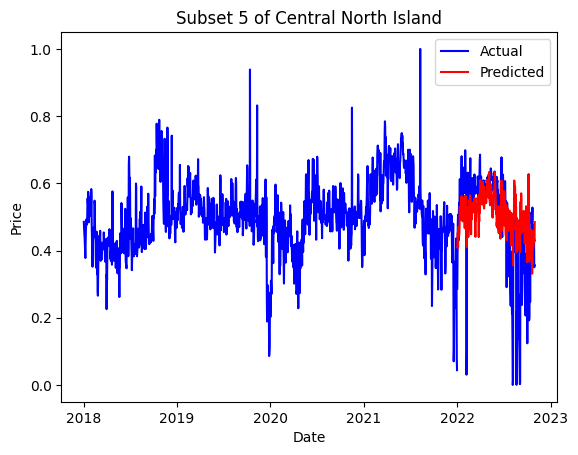

10/10 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.0033
The RMSE of the subset 5 is 0.11693766685513989


In [47]:
for i in range(5):
    x = np.linspace(0.0001 , 0.1 , 100)
    lasso_cv = LassoCV(alphas = x , cv=5)
    X_train = cni_train[i].drop('price_cni' ,axis = 1)
    y_train = cni_train[i]['price_cni']
    
    lasso_cv.fit(X_train , y_train)
    optimal_alpha = lasso_cv.alpha_
    
    final_lasso_model = Lasso(alpha=optimal_alpha)
    final_lasso_model.fit(X_train, y_train)
    selected_features = X_train.columns[final_lasso_model.coef_ != 0]
    
    X_train = X_train[selected_features]
    X_test = cni_test[i][selected_features]
    y_test = cni_test[i]['price_cni']
    
    acc = DNN(X_train , y_train , X_test , y_test , 'Central North Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

100%|██████████| 100/100 [00:18<00:00,  5.32it/s]


12/12 [==============================] - 0s 2ms/step


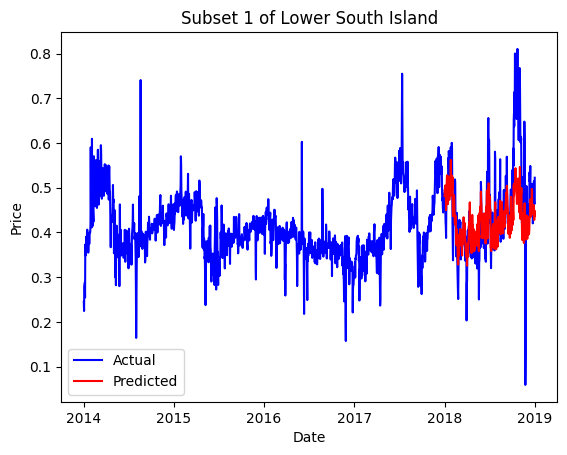

12/12 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.0000e+00
The RMSE of the subset 1 is 0.07923947984498045


100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


12/12 [==============================] - 0s 2ms/step


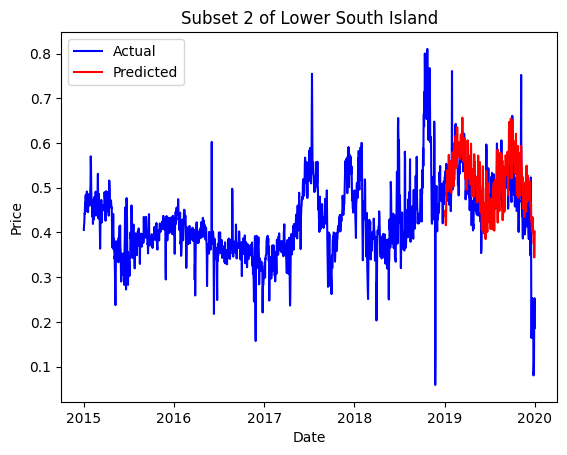

12/12 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00
The RMSE of the subset 2 is 0.06873553673529893


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


12/12 [==============================] - 0s 2ms/step


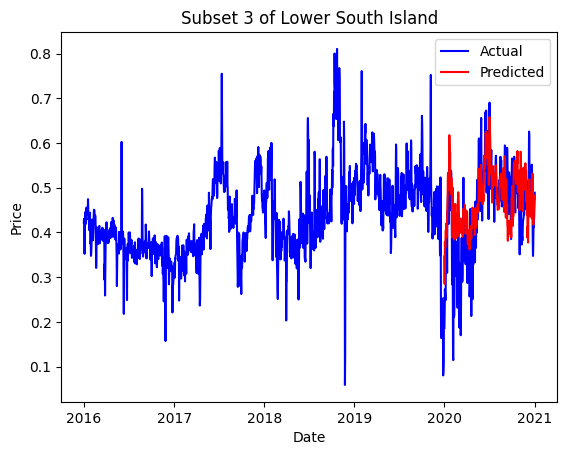

12/12 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.0000e+00
The RMSE of the subset 3 is 0.07732383236636561


100%|██████████| 100/100 [00:18<00:00,  5.32it/s]


12/12 [==============================] - 0s 2ms/step


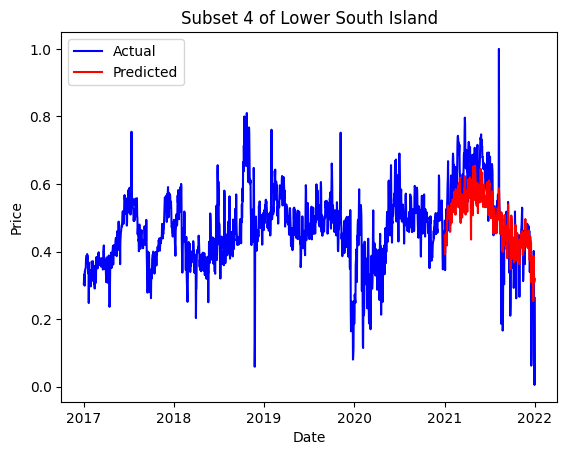

12/12 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.0027
The RMSE of the subset 4 is 0.08932773550706069


100%|██████████| 100/100 [00:19<00:00,  5.10it/s]


10/10 [==============================] - 0s 2ms/step


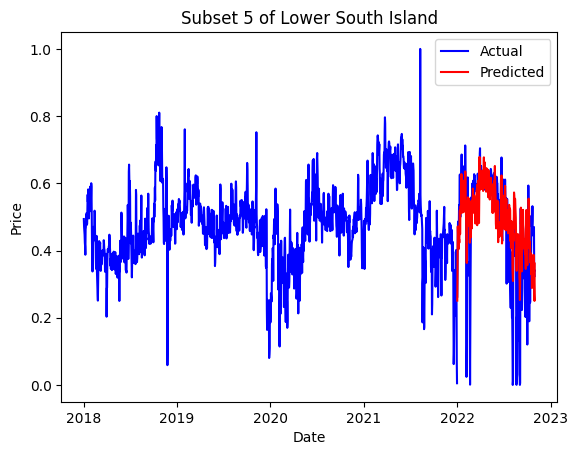

10/10 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.0033
The RMSE of the subset 5 is 0.11159575331336594


In [48]:
for i in range(5):
    x = np.linspace(0.0001 , 0.1 , 100)
    lasso_cv = LassoCV(alphas = x , cv=5)
    X_train = lsi_train[i].drop('price_lsi' ,axis = 1)
    y_train = lsi_train[i]['price_lsi']
    
    lasso_cv.fit(X_train , y_train)
    optimal_alpha = lasso_cv.alpha_
    
    final_lasso_model = Lasso(alpha=optimal_alpha)
    final_lasso_model.fit(X_train, y_train)
    selected_features = X_train.columns[final_lasso_model.coef_ != 0]
    
    X_train = X_train[selected_features]
    X_test = lsi_test[i][selected_features]
    y_test = lsi_test[i]['price_lsi']
    
    acc = DNN(X_train , y_train , X_test , y_test , 'Lower South Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

### 1.2 Mutual information selection method 

100%|██████████| 100/100 [00:19<00:00,  5.10it/s]


12/12 [==============================] - 0s 2ms/step


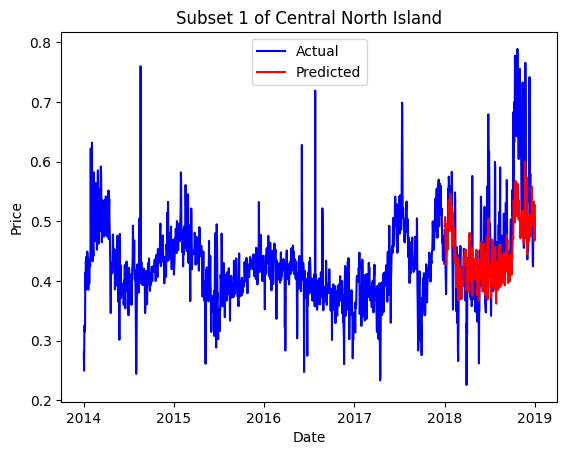

12/12 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0000e+00
The RMSE of the subset 1 is 0.07236177482296728


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


12/12 [==============================] - 0s 2ms/step


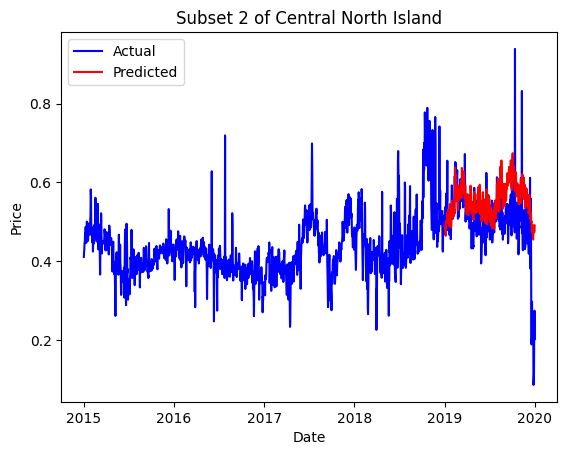

12/12 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0000e+00
The RMSE of the subset 2 is 0.08898069031724104


100%|██████████| 100/100 [00:17<00:00,  5.62it/s]


12/12 [==============================] - 0s 2ms/step


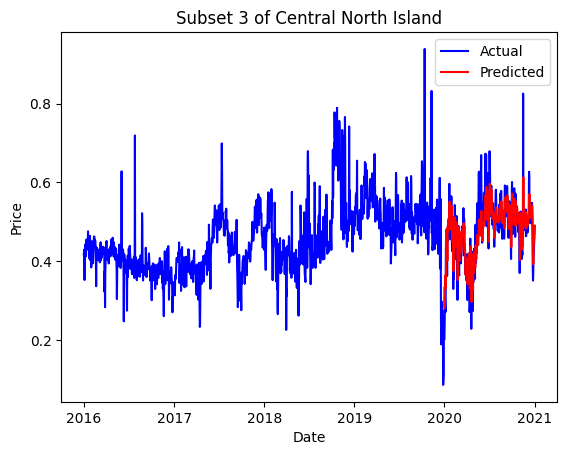

12/12 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00
The RMSE of the subset 3 is 0.05256647580697888


100%|██████████| 100/100 [00:18<00:00,  5.32it/s]


12/12 [==============================] - 0s 2ms/step


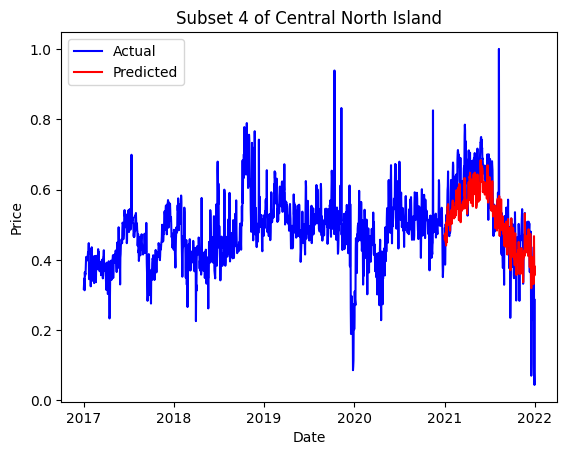

12/12 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.0027
The RMSE of the subset 4 is 0.07145760945381796


100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


10/10 [==============================] - 0s 2ms/step


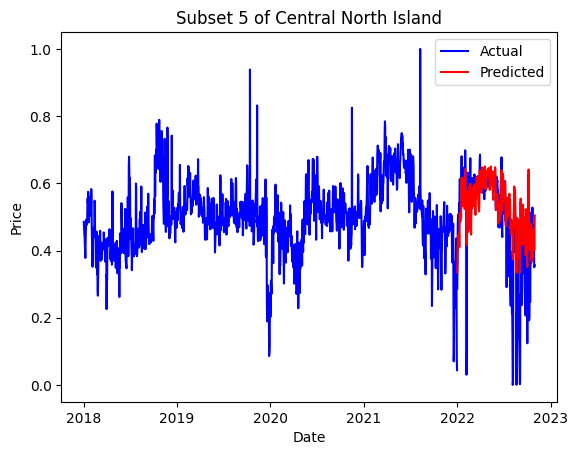

10/10 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.0033
The RMSE of the subset 5 is 0.1069807283391642


In [61]:
for i in range(5):
    X_train = cni_train[i].drop('price_cni' ,axis = 1)
    y_train = cni_train[i]['price_cni']
    X_test = cni_test[i].drop('price_cni' , axis = 1)
    y_test = cni_test[i]['price_cni']
    
    best_k = None
    best_rmse = float('inf')
    
    columns = [1,2,5,10,15,25,50,100,150]
    for k in columns :
        mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
        X_train_new = mi_selector.fit_transform(X_train, y_train)
        X_test_new = mi_selector.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_test_new)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_k = k
    
    
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
    X_new = mi_selector.fit_transform(X_train, y_train)

    selected_feature_indices = mi_selector.get_support(indices=True)

    selected_features = X_train.columns[selected_feature_indices]
    X_train = X_train[selected_features]
    X_test = cni_test[i][selected_features]
    y_test = cni_test[i]['price_cni']

    acc = DNN(X_train , y_train , X_test , y_test , 'Central North Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

100%|██████████| 100/100 [00:19<00:00,  5.05it/s]


12/12 [==============================] - 0s 2ms/step


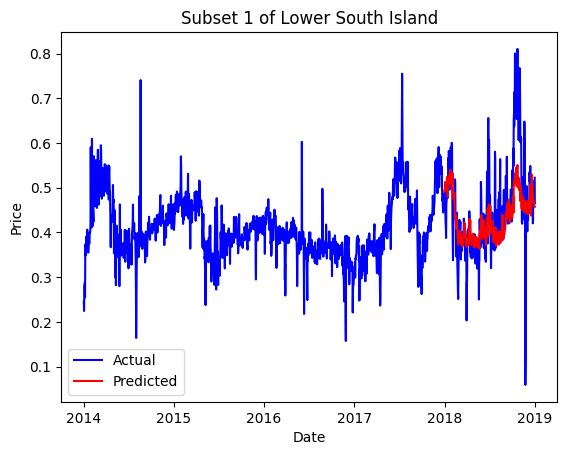

12/12 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.0000e+00
The RMSE of the subset 1 is 0.078748627349117


100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


12/12 [==============================] - 0s 2ms/step


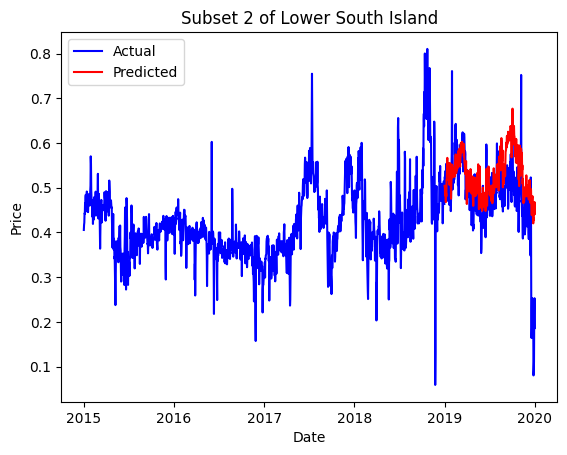

12/12 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.0000e+00
The RMSE of the subset 2 is 0.07972197831375452


100%|██████████| 100/100 [00:17<00:00,  5.56it/s]


12/12 [==============================] - 0s 2ms/step


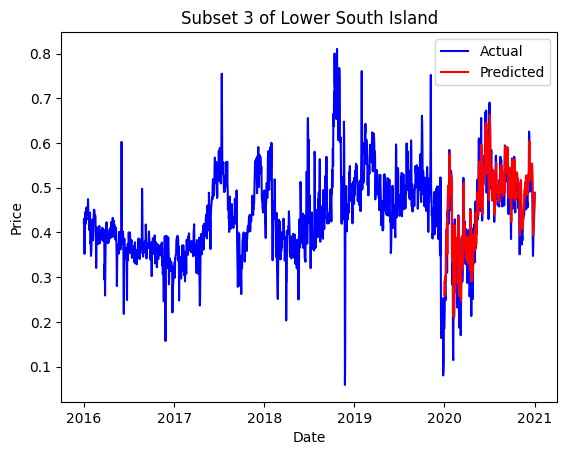

12/12 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.0000e+00
The RMSE of the subset 3 is 0.05129843798239103


100%|██████████| 100/100 [00:19<00:00,  5.10it/s]


12/12 [==============================] - 0s 2ms/step


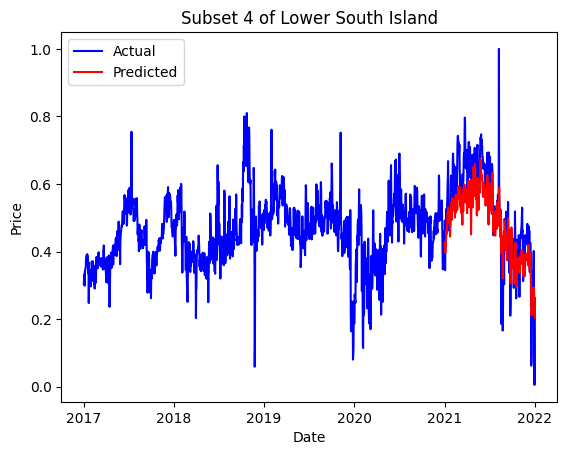

12/12 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0027
The RMSE of the subset 4 is 0.081845542902554


100%|██████████| 100/100 [00:18<00:00,  5.31it/s]


10/10 [==============================] - 0s 2ms/step


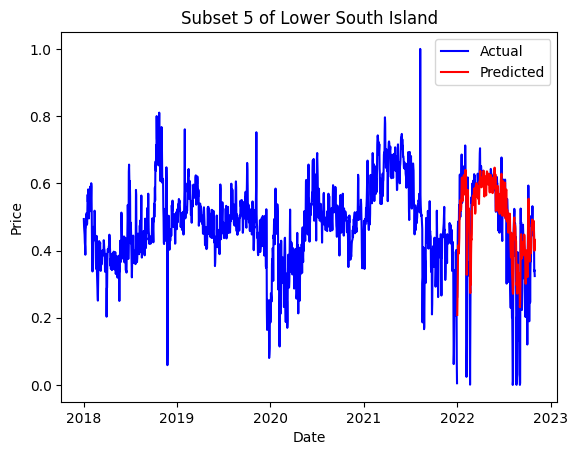

10/10 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.0033
The RMSE of the subset 5 is 0.08880274588058001


In [67]:
for i in range(5):
    X_train = lsi_train[i].drop('price_lsi' ,axis = 1)
    y_train = lsi_train[i]['price_lsi']
    X_test = lsi_test[i].drop('price_lsi' , axis = 1)
    y_test = lsi_test[i]['price_lsi']
    
    best_k = None
    best_rmse = float('inf')
    
    columns = [1, 2, 5, 10, 15, 25, 50, 100, 150]
    for k in columns:
        mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
        X_train_new = mi_selector.fit_transform(X_train, y_train)
        X_test_new = mi_selector.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_test_new)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_k = k
    
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
    X_new = mi_selector.fit_transform(X_train, y_train)

    selected_feature_indices = mi_selector.get_support(indices=True)

    selected_features = X_train.columns[selected_feature_indices]
    X_train = X_train[selected_features]
    X_test = lsi_test[i][selected_features]
    y_test = lsi_test[i]['price_lsi']

    acc = DNN(X_train , y_train , X_test , y_test , 'Lower South Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

### 1.3 Recursive feature elimination 

100%|██████████| 100/100 [00:17<00:00,  5.86it/s]


12/12 [==============================] - 0s 2ms/step


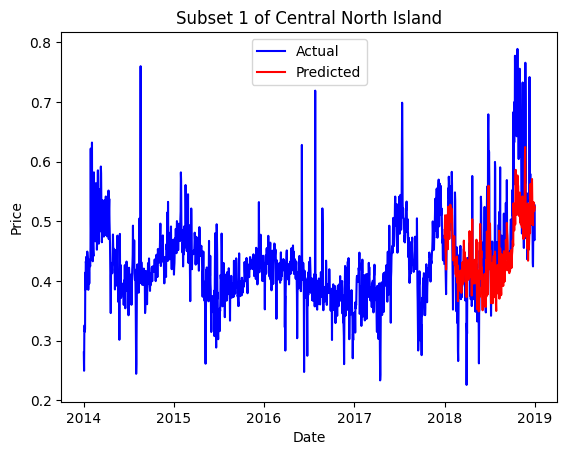

12/12 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.0000e+00
The RMSE of the subset 1 with 150 features using RFE is 0.042681267978841544


100%|██████████| 100/100 [00:16<00:00,  5.90it/s]


12/12 [==============================] - 0s 1ms/step


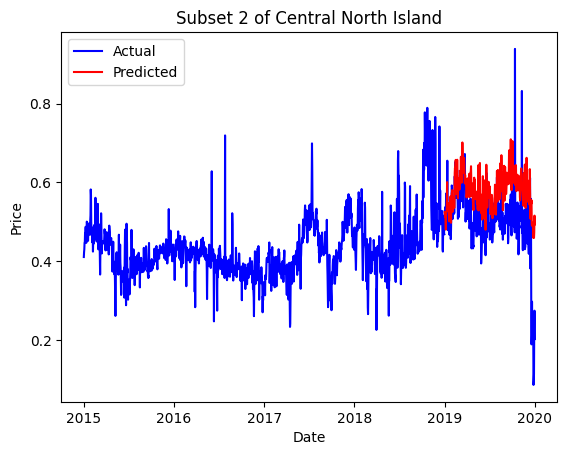

12/12 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.0000e+00
The RMSE of the subset 2 with 150 features using RFE is 0.04841464032495025


100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


12/12 [==============================] - 0s 1ms/step


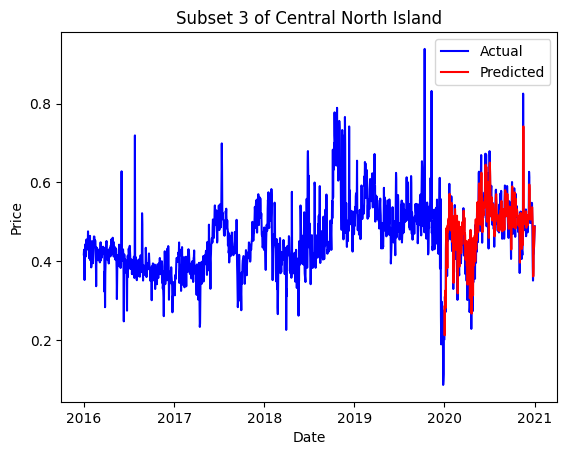

12/12 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00
The RMSE of the subset 3 with 2 features using RFE is 0.05182019327539199


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


12/12 [==============================] - 0s 1ms/step


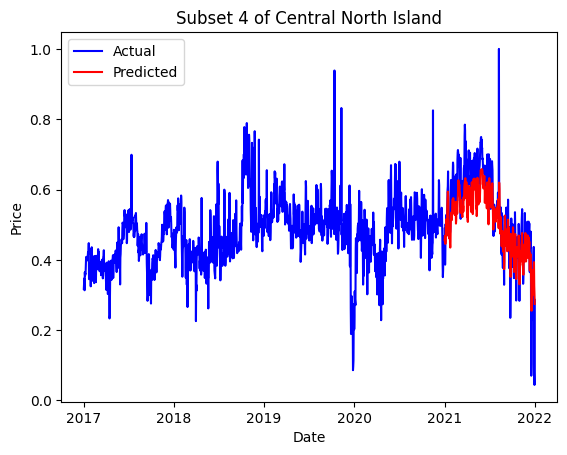

12/12 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.0027
The RMSE of the subset 4 with 50 features using RFE is 0.046711483886111585


100%|██████████| 100/100 [00:16<00:00,  5.93it/s]


10/10 [==============================] - 0s 2ms/step


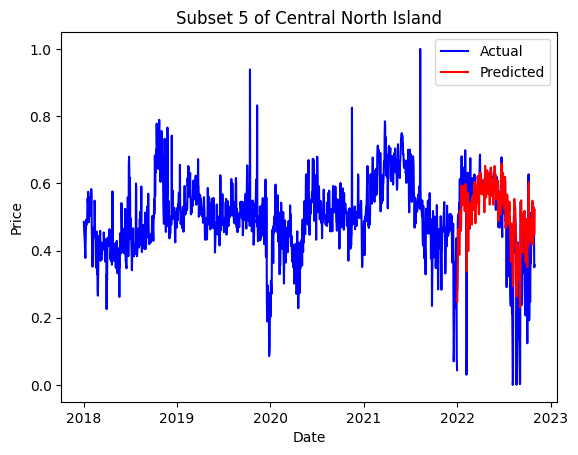

10/10 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.0033
The RMSE of the subset 5 with 50 features using RFE is 0.07117529758775265


In [74]:
n_features_to_select = [1, 2, 3, 5, 10,15 , 20, 25, 50,75, 100,125,150]

for i in range(5):
    X_train = cni_train[i].drop('price_cni', axis=1)
    y_train = cni_train[i]['price_cni']
    X_test = cni_test[i].drop('price_cni', axis=1)
    y_test = cni_test[i]['price_cni']
    
    best_rmse = float('inf')
    best_n_features = None
    
    for n_features in n_features_to_select:
        model = LinearRegression()
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
    
        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
    
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
        if rmse < best_rmse:
            best_rmse = rmse
            best_n_features = n_features
    
    rfe = RFE(estimator=model, n_features_to_select=best_n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    acc = DNN(X_train_rfe, y_train, X_test_rfe, y_test, 'Central North Island')
    
    print(f'The RMSE of the subset {i+1} with {best_n_features} features using RFE is {best_rmse}')


100%|██████████| 100/100 [00:17<00:00,  5.84it/s]


12/12 [==============================] - 0s 2ms/step


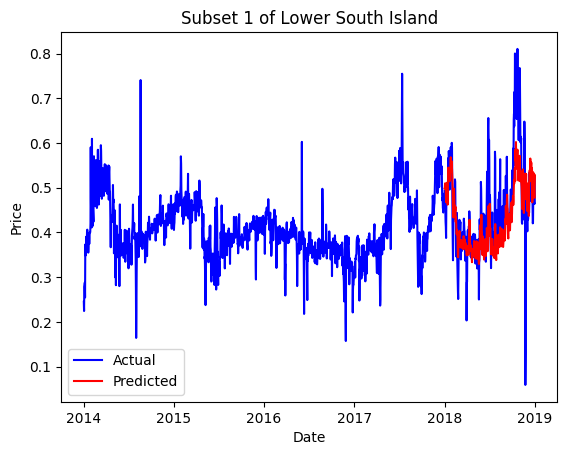

12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00
The RMSE of the subset 1 with 150 features using RFE is 0.04629446917818649


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]


12/12 [==============================] - 0s 2ms/step


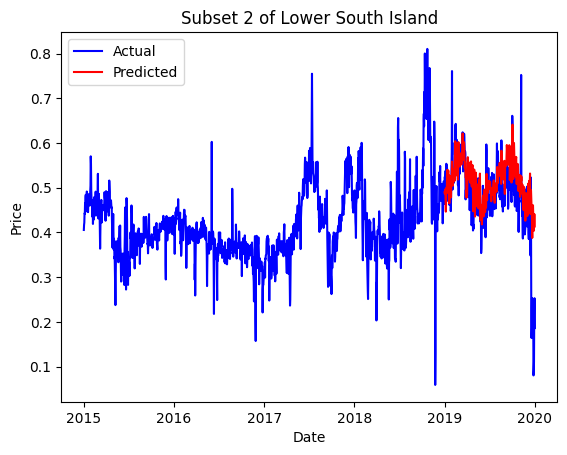

12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0000e+00
The RMSE of the subset 2 with 150 features using RFE is 0.03901180767014163


100%|██████████| 100/100 [00:17<00:00,  5.82it/s]


12/12 [==============================] - 0s 2ms/step


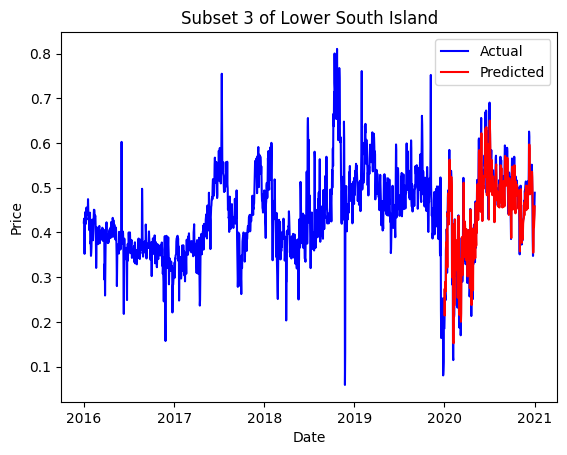

12/12 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00
The RMSE of the subset 3 with 1 features using RFE is 0.049751635973080424


100%|██████████| 100/100 [00:16<00:00,  5.93it/s]


12/12 [==============================] - 0s 2ms/step


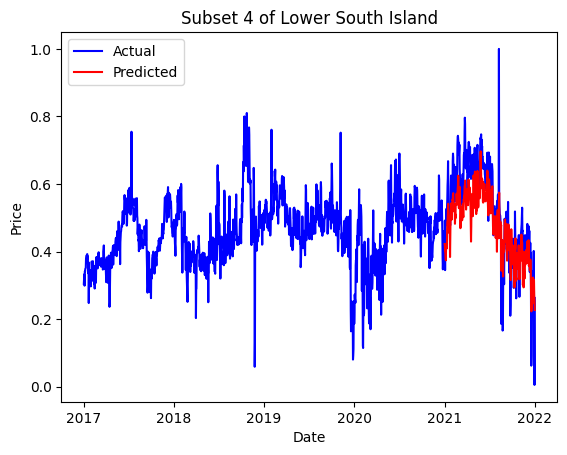

12/12 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.0027
The RMSE of the subset 4 with 150 features using RFE is 0.05052138778206336


100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


10/10 [==============================] - 0s 2ms/step


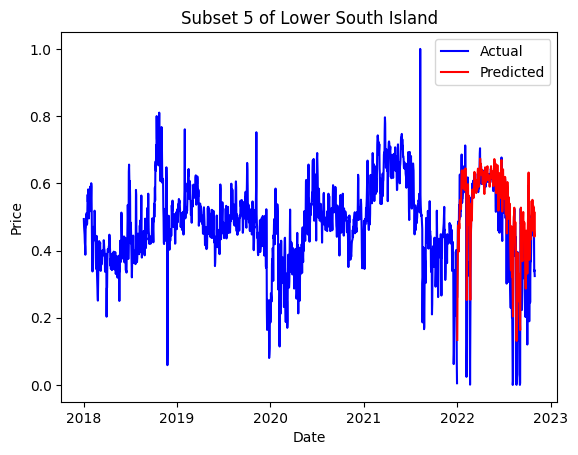

10/10 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.0033
The RMSE of the subset 5 with 50 features using RFE is 0.06880061002536092


In [73]:
n_features_to_select = [1, 2, 3, 5, 10, 20, 25, 50, 100, 150]

for i in range(5):
    X_train = lsi_train[i].drop('price_lsi', axis=1)
    y_train = lsi_train[i]['price_lsi']
    X_test = lsi_test[i].drop('price_lsi', axis=1)
    y_test = lsi_test[i]['price_lsi']
    
    best_rmse = float('inf')
    best_n_features = None
    
    for n_features in n_features_to_select:
        model = LinearRegression()
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
    
        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
    
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
        if rmse < best_rmse:
            best_rmse = rmse
            best_n_features = n_features
    
    rfe = RFE(estimator=model, n_features_to_select= best_n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    acc = DNN(X_train_rfe , y_train , X_test_rfe , y_test , 'Lower South Island')
    
    print(f'The RMSE of the subset {i+1} with {best_n_features} features using RFE is {best_rmse}')


## 2. GARCH(1,1)(Generalized Autoregressive Conditional Heteroskedasticity)

Read more about garch :- https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

In [88]:
import arch
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import arch

def GARCH(X_train, y_train, X_test, y_test, name):

    model = arch.arch_model(y_train, vol='Garch', p=1, q=1)

    results = model.fit()

    omega = results.conditional_volatility.iloc[-1]
    alpha = results.params['alpha[1]']
    beta = results.params['beta[1]']

    forecast_volatility = np.zeros(len(y_test))

    forecast_volatility[0] = np.sqrt(omega / (1 - alpha - beta))

    for t in range(1, len(y_test)):
        forecast_volatility[t] = np.sqrt(omega + alpha * y_test[t-1]**2 + beta * forecast_volatility[t-1]**2)
    
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_test - forecast_volatility)).numpy())

    plt.plot(y_train.index, y_train, label='Actual', color='b')
    plt.plot(y_test.index, y_test, color='b')
    plt.plot(y_test.index, forecast_volatility, label='Predicted', color='g')
    plt.title(f'Subset {i+1} of {name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return rmse


### 2.1 Lasso Feature Selection method

For each cross-validation set, we perform a grid search over the values of 
 in the range [10-4 , 10-1]
 with a step size of 10−3. 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96015648.48919727
Iteration:      2,   Func. Count:     18,   Neg. LLF: 19342772.26136746
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2378.0746319719897
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2378.0746370314755
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3


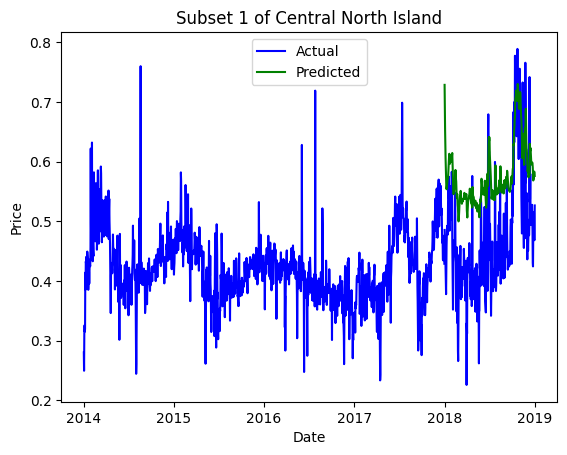

The RMSE of the subset 1 is 0.12219130328510895
Iteration:      1,   Func. Count:      6,   Neg. LLF: 171187244.22414064
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3521897.7605115967
Iteration:      3,   Func. Count:     30,   Neg. LLF: 3092690.40440853
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2192.1562621660155
            Iterations: 3
            Function evaluations: 38
            Gradient evaluations: 3


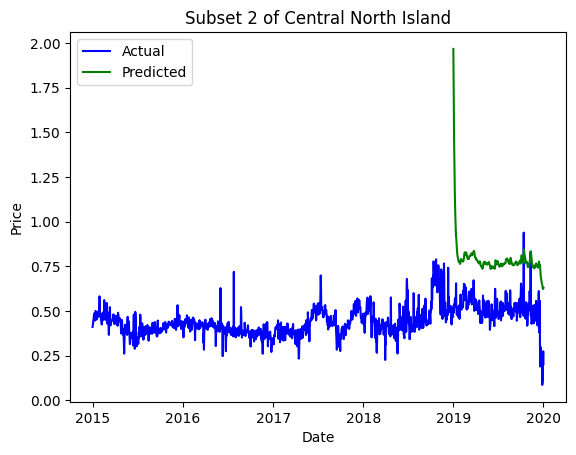

The RMSE of the subset 2 is 0.309150026843523
Iteration:      1,   Func. Count:      6,   Neg. LLF: 380280227.14257675
Iteration:      2,   Func. Count:     18,   Neg. LLF: -454.9184577002636
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1837.0837174791725
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1515.811829574622
Iteration:      5,   Func. Count:     40,   Neg. LLF: -19.00099811651785
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1853.9811130713028
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1829.324997317286
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1873.5302317157689
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1875.2304748095598
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1875.3382643804143
Iteration:     11,   Func. Count:     74,   Neg. LLF: -1875.3496040078205
Iteration:     12,   Func. Count:     79,   Neg. LLF: -1875.3497216211993
Iteration:     13,   Func. Count:     83,   Neg. LLF: -1875.34972185271

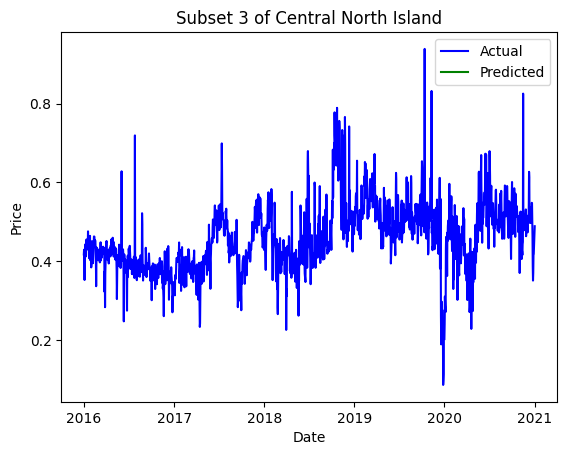

The RMSE of the subset 3 is nan
Iteration:      1,   Func. Count:      6,   Neg. LLF: 109631329.60674024
Iteration:      2,   Func. Count:     17,   Neg. LLF: 21042666607.52159
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3213107.0805893303
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1177.9739926021675
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1417.3269347634746
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1730.5059390961155
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1677.7053154909909
Iteration:      8,   Func. Count:     59,   Neg. LLF: -151.38542442511732
Iteration:      9,   Func. Count:     65,   Neg. LLF: 782294087.5017264
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1636.1123789245441
Iteration:     11,   Func. Count:     77,   Neg. LLF: -1708.951653369047
Iteration:     12,   Func. Count:     83,   Neg. LLF: -1752.0888565923437
Iteration:     13,   Func. Count:     89,   Neg. LLF: -1750.448008980034
Iteration:     1

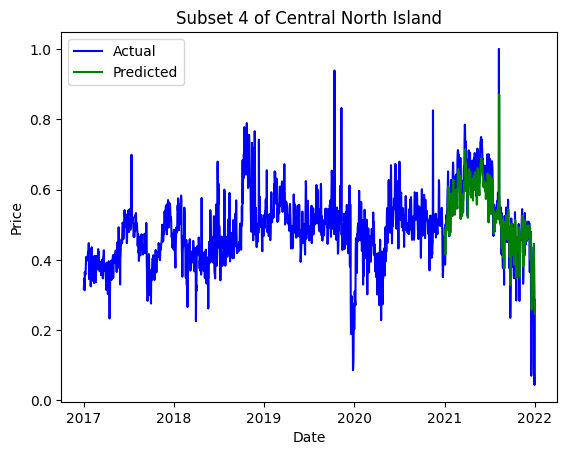

The RMSE of the subset 4 is 0.06510346470406865
Iteration:      1,   Func. Count:      6,   Neg. LLF: 576671.1538961946
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2108.867837607695
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1394.215852533606
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3777189.219013931
Iteration:      5,   Func. Count:     44,   Neg. LLF: -682.2726488315861
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1583.6437265724148
Iteration:      7,   Func. Count:     56,   Neg. LLF: -1603.9234990302825
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1609.3700175463366
Iteration:      9,   Func. Count:     66,   Neg. LLF: -1610.8070069379082
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1611.1960127958573
Iteration:     11,   Func. Count:     76,   Neg. LLF: -1612.6711869058263
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1613.0660855056312
Iteration:     13,   Func. Count:     86,   Neg. LLF: -1613.0816817613268

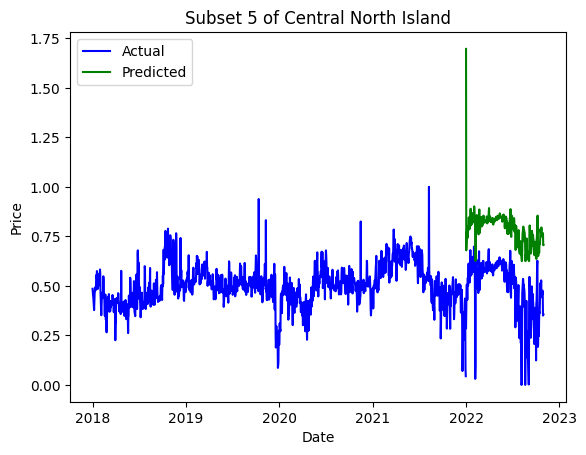

The RMSE of the subset 5 is 0.317327084687026


In [89]:
for i in range(5):
    x = np.linspace(0.0001 , 0.1 , 100)
    lasso_cv = LassoCV(alphas = x , cv=5)
    X_train = cni_train[i].drop('price_cni' ,axis = 1)
    y_train = cni_train[i]['price_cni']
    
    lasso_cv.fit(X_train , y_train)
    optimal_alpha = lasso_cv.alpha_
    
    final_lasso_model = Lasso(alpha=optimal_alpha)
    final_lasso_model.fit(X_train, y_train)
    selected_features = X_train.columns[final_lasso_model.coef_ != 0]
    
    X_train = X_train[selected_features]
    X_test = cni_test[i][selected_features]
    y_test = cni_test[i]['price_cni']
    
    acc = GARCH(X_train , y_train , X_test , y_test , 'Central North Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

Iteration:      1,   Func. Count:      6,   Neg. LLF: 127280642.25621188
Iteration:      2,   Func. Count:     18,   Neg. LLF: 37893.17941296022
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30065.653076659382
Iteration:      4,   Func. Count:     39,   Neg. LLF: 13644.317439150505
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1376.4218422581157
Iteration:      6,   Func. Count:     59,   Neg. LLF: 11090.628111630362
Iteration:      7,   Func. Count:     69,   Neg. LLF: -2292.440410258962
Iteration:      8,   Func. Count:     74,   Neg. LLF: 1077.9337476665785
Iteration:      9,   Func. Count:     80,   Neg. LLF: -2277.3106367839773
Iteration:     10,   Func. Count:     87,   Neg. LLF: -2260.9013905977026
Iteration:     11,   Func. Count:     93,   Neg. LLF: -2298.632917057848
Iteration:     12,   Func. Count:     98,   Neg. LLF: -2299.399107966126
Iteration:     13,   Func. Count:    103,   Neg. LLF: -2300.1501909996286
Iteration:     14,   Func. Count:    108,   Neg. 

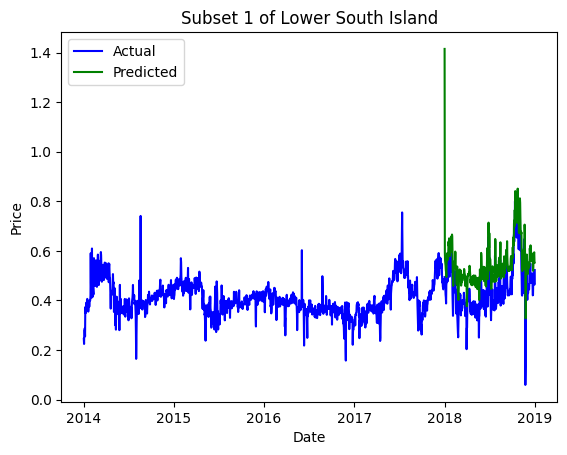

The RMSE of the subset 1 is 0.11811000562725396
Iteration:      1,   Func. Count:      6,   Neg. LLF: 227860558.43822753
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1.28915695134108e+16
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2126.950826858808
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2126.9508321391713
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3


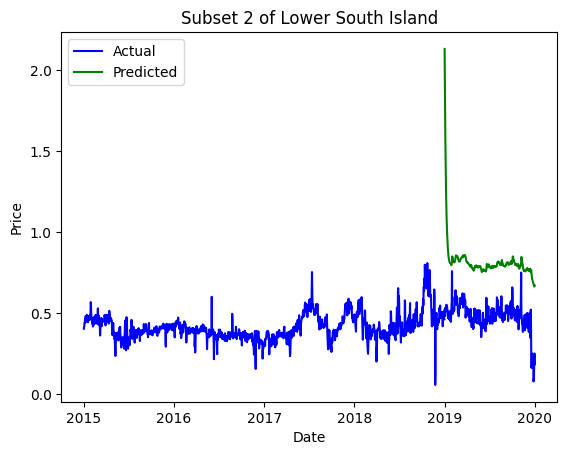

The RMSE of the subset 2 is 0.35856739243046265
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49932504.563742384
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6998.234762549496
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3775.1069766330315
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1103498.016106911
Iteration:      5,   Func. Count:     40,   Neg. LLF: 13728.379045587044
Iteration:      6,   Func. Count:     50,   Neg. LLF: 3881.599430714816
Iteration:      7,   Func. Count:     60,   Neg. LLF: -1776.9433584431404
Iteration:      8,   Func. Count:     66,   Neg. LLF: 204.93604672639867
Iteration:      9,   Func. Count:     73,   Neg. LLF: -1826.302411509285
Iteration:     10,   Func. Count:     79,   Neg. LLF: -1856.308762360141
Iteration:     11,   Func. Count:     84,   Neg. LLF: -1856.5069045197506
Iteration:     12,   Func. Count:     89,   Neg. LLF: -1856.5428742872882
Iteration:     13,   Func. Count:     94,   Neg. LLF: -1856.544680475446
Ite

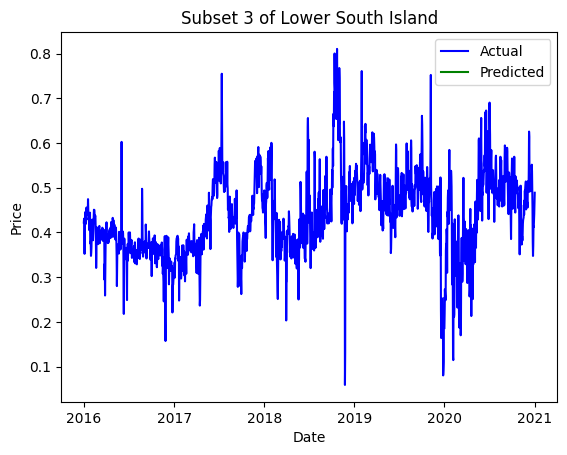

The RMSE of the subset 3 is nan
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47869076.16932519
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1687.1663011847077
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1598.8123761262696
Iteration:      4,   Func. Count:     30,   Neg. LLF: 263.49450329530555
Iteration:      5,   Func. Count:     37,   Neg. LLF: -1544.6387300210756
Iteration:      6,   Func. Count:     43,   Neg. LLF: -1722.8227072256427
Iteration:      7,   Func. Count:     49,   Neg. LLF: -1749.175276612486
Iteration:      8,   Func. Count:     54,   Neg. LLF: 580.4206698530706
Iteration:      9,   Func. Count:     61,   Neg. LLF: -1722.520168532446
Iteration:     10,   Func. Count:     68,   Neg. LLF: -1749.337917292214
Iteration:     11,   Func. Count:     73,   Neg. LLF: -1749.3391123240126
Iteration:     12,   Func. Count:     78,   Neg. LLF: -1749.339114169646
Iteration:     13,   Func. Count:     82,   Neg. LLF: -1749.3391141695543
Optimization te

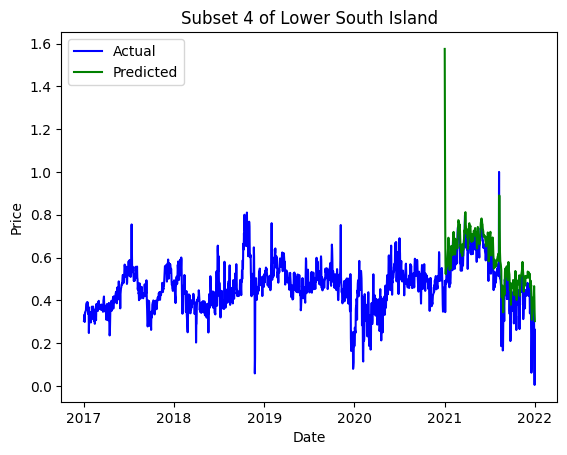

The RMSE of the subset 4 is 0.1166363799509156
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2795150.0464982353
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2593306.7503905925
Iteration:      3,   Func. Count:     26,   Neg. LLF: 758658.0755053257
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1421.8848426188542
Iteration:      5,   Func. Count:     44,   Neg. LLF: -1482.9134717166453
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1482.9134786089903
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 5


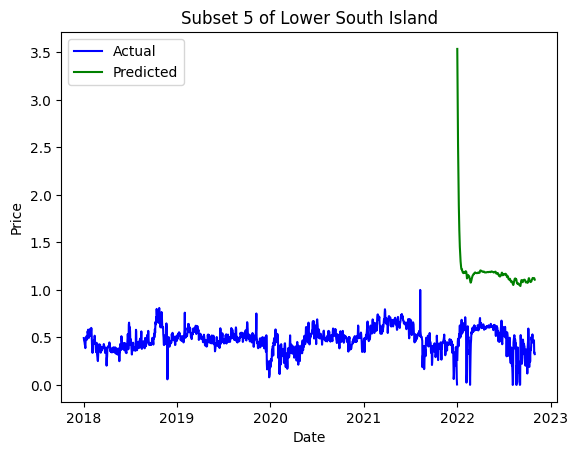

The RMSE of the subset 5 is 0.7576308285025878


In [90]:
for i in range(5):
    x = np.linspace(0.0001 , 0.1 , 100)
    lasso_cv = LassoCV(alphas = x , cv=5)
    X_train = lsi_train[i].drop('price_lsi' ,axis = 1)
    y_train = lsi_train[i]['price_lsi']
    
    lasso_cv.fit(X_train , y_train)
    optimal_alpha = lasso_cv.alpha_
    
    final_lasso_model = Lasso(alpha=optimal_alpha)
    final_lasso_model.fit(X_train, y_train)
    selected_features = X_train.columns[final_lasso_model.coef_ != 0]
    
    X_train = X_train[selected_features]
    X_test = lsi_test[i][selected_features]
    y_test = lsi_test[i]['price_lsi']
    
    acc = GARCH(X_train , y_train , X_test , y_test , 'Lower South Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

### 2.2 Mutual information feature selection method.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96015648.48919727
Iteration:      2,   Func. Count:     18,   Neg. LLF: 19342772.26136746
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2378.0746319719897
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2378.0746370314755
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3


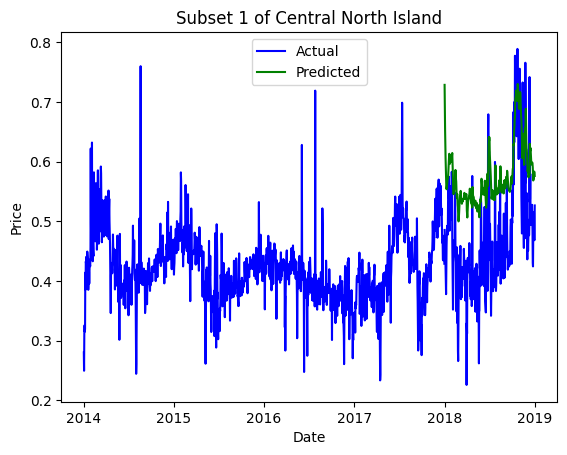

The RMSE of the subset 1 is 0.12219130328510895
Iteration:      1,   Func. Count:      6,   Neg. LLF: 171187244.22414064
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3521897.7605115967
Iteration:      3,   Func. Count:     30,   Neg. LLF: 3092690.40440853
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2192.1562621660155
            Iterations: 3
            Function evaluations: 38
            Gradient evaluations: 3


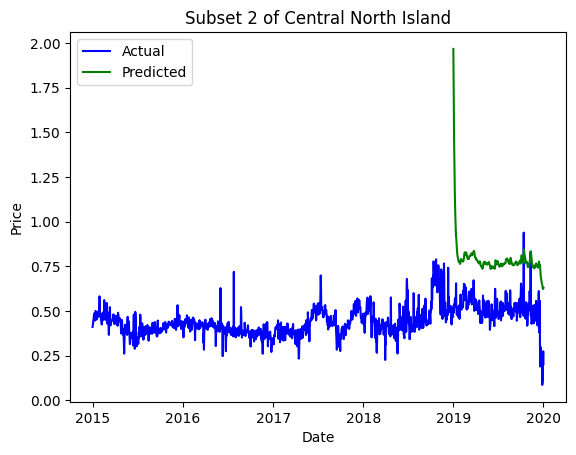

The RMSE of the subset 2 is 0.309150026843523
Iteration:      1,   Func. Count:      6,   Neg. LLF: 380280227.14257675
Iteration:      2,   Func. Count:     18,   Neg. LLF: -454.9184577002636
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1837.0837174791725
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1515.811829574622
Iteration:      5,   Func. Count:     40,   Neg. LLF: -19.00099811651785
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1853.9811130713028
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1829.324997317286
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1873.5302317157689
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1875.2304748095598
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1875.3382643804143
Iteration:     11,   Func. Count:     74,   Neg. LLF: -1875.3496040078205
Iteration:     12,   Func. Count:     79,   Neg. LLF: -1875.3497216211993
Iteration:     13,   Func. Count:     83,   Neg. LLF: -1875.34972185271

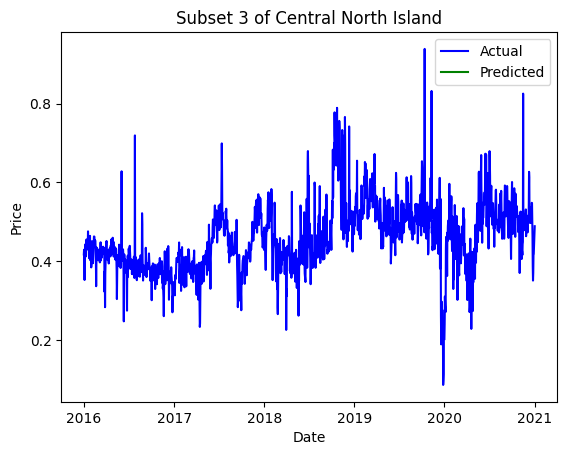

The RMSE of the subset 3 is nan
Iteration:      1,   Func. Count:      6,   Neg. LLF: 109631329.60674024
Iteration:      2,   Func. Count:     17,   Neg. LLF: 21042666607.52159
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3213107.0805893303
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1177.9739926021675
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1417.3269347634746
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1730.5059390961155
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1677.7053154909909
Iteration:      8,   Func. Count:     59,   Neg. LLF: -151.38542442511732
Iteration:      9,   Func. Count:     65,   Neg. LLF: 782294087.5017264
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1636.1123789245441
Iteration:     11,   Func. Count:     77,   Neg. LLF: -1708.951653369047
Iteration:     12,   Func. Count:     83,   Neg. LLF: -1752.0888565923437
Iteration:     13,   Func. Count:     89,   Neg. LLF: -1750.448008980034
Iteration:     1

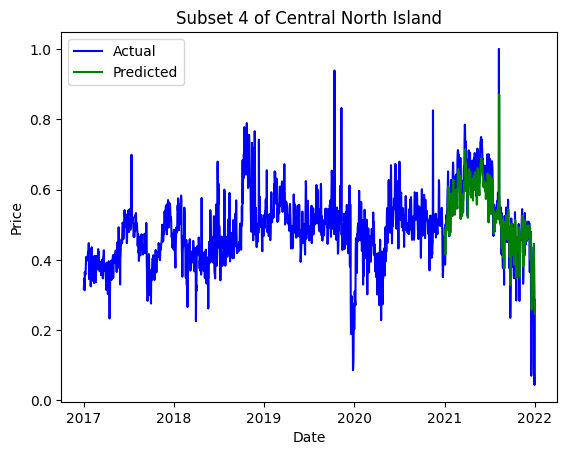

The RMSE of the subset 4 is 0.06510346470406865
Iteration:      1,   Func. Count:      6,   Neg. LLF: 576671.1538961946
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2108.867837607695
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1394.215852533606
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3777189.219013931
Iteration:      5,   Func. Count:     44,   Neg. LLF: -682.2726488315861
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1583.6437265724148
Iteration:      7,   Func. Count:     56,   Neg. LLF: -1603.9234990302825
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1609.3700175463366
Iteration:      9,   Func. Count:     66,   Neg. LLF: -1610.8070069379082
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1611.1960127958573
Iteration:     11,   Func. Count:     76,   Neg. LLF: -1612.6711869058263
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1613.0660855056312
Iteration:     13,   Func. Count:     86,   Neg. LLF: -1613.0816817613268

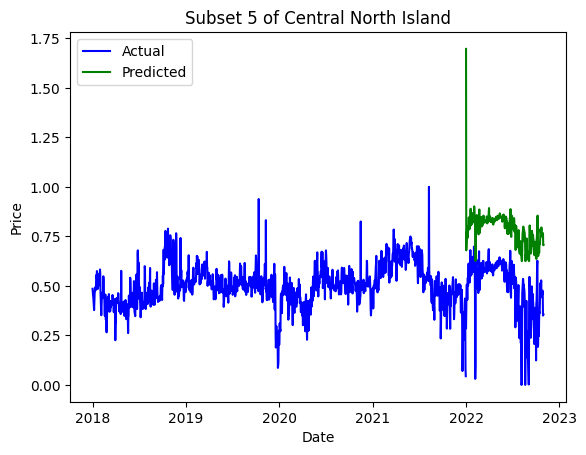

The RMSE of the subset 5 is 0.317327084687026


In [92]:
for i in range(5):
    X_train = cni_train[i].drop('price_cni' ,axis = 1)
    y_train = cni_train[i]['price_cni']
    X_test = cni_test[i].drop('price_cni' , axis = 1)
    y_test = cni_test[i]['price_cni']
    
    best_k = None
    best_rmse = float('inf')
    
    columns = [1,2,5,10,15,25,50,100,150]
    for k in columns :
        mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
        X_train_new = mi_selector.fit_transform(X_train, y_train)
        X_test_new = mi_selector.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_test_new)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_k = k
    
    
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
    X_new = mi_selector.fit_transform(X_train, y_train)

    selected_feature_indices = mi_selector.get_support(indices=True)

    selected_features = X_train.columns[selected_feature_indices]
    X_train = X_train[selected_features]
    X_test = cni_test[i][selected_features]
    y_test = cni_test[i]['price_cni']

    acc = GARCH(X_train , y_train , X_test , y_test , 'Central North Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

Iteration:      1,   Func. Count:      6,   Neg. LLF: 127280642.25621188
Iteration:      2,   Func. Count:     18,   Neg. LLF: 37893.17941296022
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30065.653076659382
Iteration:      4,   Func. Count:     39,   Neg. LLF: 13644.317439150505
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1376.4218422581157
Iteration:      6,   Func. Count:     59,   Neg. LLF: 11090.628111630362
Iteration:      7,   Func. Count:     69,   Neg. LLF: -2292.440410258962
Iteration:      8,   Func. Count:     74,   Neg. LLF: 1077.9337476665785
Iteration:      9,   Func. Count:     80,   Neg. LLF: -2277.3106367839773
Iteration:     10,   Func. Count:     87,   Neg. LLF: -2260.9013905977026
Iteration:     11,   Func. Count:     93,   Neg. LLF: -2298.632917057848
Iteration:     12,   Func. Count:     98,   Neg. LLF: -2299.399107966126
Iteration:     13,   Func. Count:    103,   Neg. LLF: -2300.1501909996286
Iteration:     14,   Func. Count:    108,   Neg. 

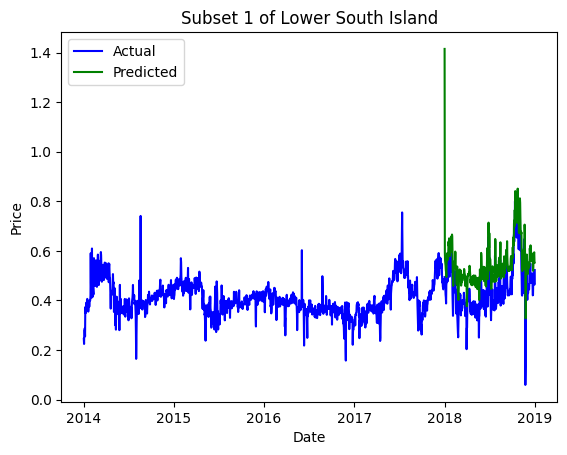

The RMSE of the subset 1 is 0.11811000562725396
Iteration:      1,   Func. Count:      6,   Neg. LLF: 227860558.43822753
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1.28915695134108e+16
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2126.950826858808
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2126.9508321391713
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3


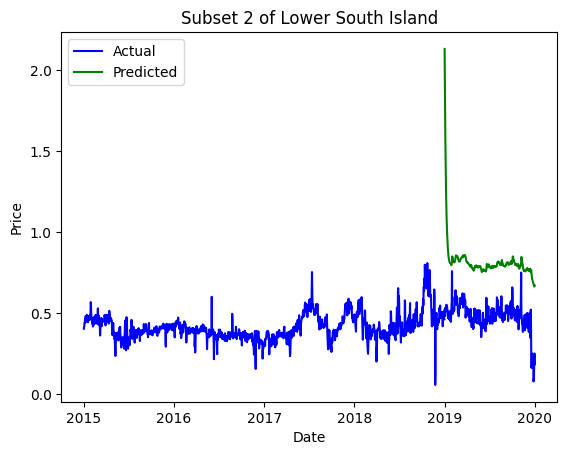

The RMSE of the subset 2 is 0.35856739243046265
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49932504.563742384
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6998.234762549496
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3775.1069766330315
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1103498.016106911
Iteration:      5,   Func. Count:     40,   Neg. LLF: 13728.379045587044
Iteration:      6,   Func. Count:     50,   Neg. LLF: 3881.599430714816
Iteration:      7,   Func. Count:     60,   Neg. LLF: -1776.9433584431404
Iteration:      8,   Func. Count:     66,   Neg. LLF: 204.93604672639867
Iteration:      9,   Func. Count:     73,   Neg. LLF: -1826.302411509285
Iteration:     10,   Func. Count:     79,   Neg. LLF: -1856.308762360141
Iteration:     11,   Func. Count:     84,   Neg. LLF: -1856.5069045197506
Iteration:     12,   Func. Count:     89,   Neg. LLF: -1856.5428742872882
Iteration:     13,   Func. Count:     94,   Neg. LLF: -1856.544680475446
Ite

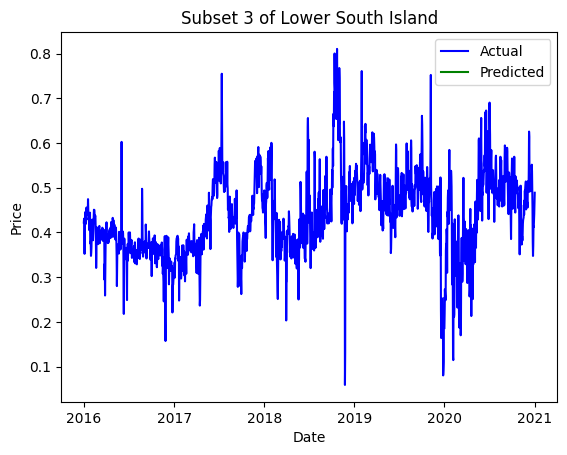

The RMSE of the subset 3 is nan
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47869076.16932519
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1687.1663011847077
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1598.8123761262696
Iteration:      4,   Func. Count:     30,   Neg. LLF: 263.49450329530555
Iteration:      5,   Func. Count:     37,   Neg. LLF: -1544.6387300210756
Iteration:      6,   Func. Count:     43,   Neg. LLF: -1722.8227072256427
Iteration:      7,   Func. Count:     49,   Neg. LLF: -1749.175276612486
Iteration:      8,   Func. Count:     54,   Neg. LLF: 580.4206698530706
Iteration:      9,   Func. Count:     61,   Neg. LLF: -1722.520168532446
Iteration:     10,   Func. Count:     68,   Neg. LLF: -1749.337917292214
Iteration:     11,   Func. Count:     73,   Neg. LLF: -1749.3391123240126
Iteration:     12,   Func. Count:     78,   Neg. LLF: -1749.339114169646
Iteration:     13,   Func. Count:     82,   Neg. LLF: -1749.3391141695543
Optimization te

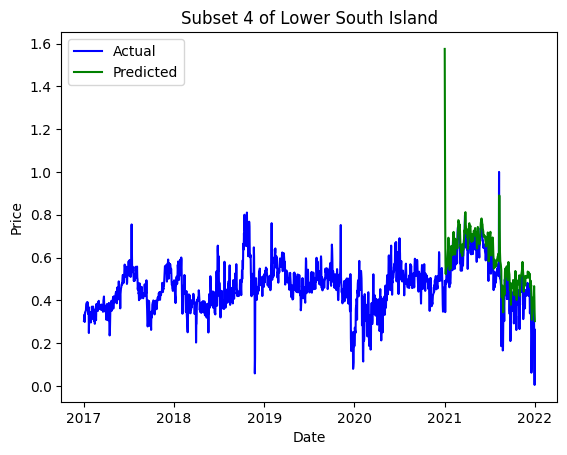

The RMSE of the subset 4 is 0.1166363799509156
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2795150.0464982353
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2593306.7503905925
Iteration:      3,   Func. Count:     26,   Neg. LLF: 758658.0755053257
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1421.8848426188542
Iteration:      5,   Func. Count:     44,   Neg. LLF: -1482.9134717166453
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1482.9134786089903
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 5


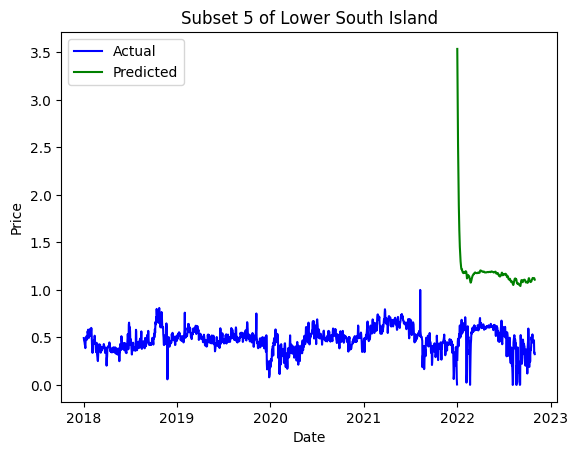

The RMSE of the subset 5 is 0.7576308285025878


In [94]:
for i in range(5):
    X_train = lsi_train[i].drop('price_lsi' ,axis = 1)
    y_train = lsi_train[i]['price_lsi']
    X_test = lsi_test[i].drop('price_lsi' , axis = 1)
    y_test = lsi_test[i]['price_lsi']
    
    best_k = None
    best_rmse = float('inf')
    
    columns = [1, 2, 5, 10, 15, 25, 50, 100, 150]
    for k in columns:
        mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
        X_train_new = mi_selector.fit_transform(X_train, y_train)
        X_test_new = mi_selector.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_test_new)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_k = k
    
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
    X_new = mi_selector.fit_transform(X_train, y_train)

    selected_feature_indices = mi_selector.get_support(indices=True)

    selected_features = X_train.columns[selected_feature_indices]
    X_train = X_train[selected_features]
    X_test = lsi_test[i][selected_features]
    y_test = lsi_test[i]['price_lsi']

    acc = GARCH(X_train , y_train , X_test , y_test , 'Lower South Island')
    print(f'The RMSE of the subset {i+1} is {acc}')

### 2.3 Recursive feature elimination 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96015648.48919727
Iteration:      2,   Func. Count:     18,   Neg. LLF: 19342772.26136746
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2378.0746319719897
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2378.0746370314755
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3


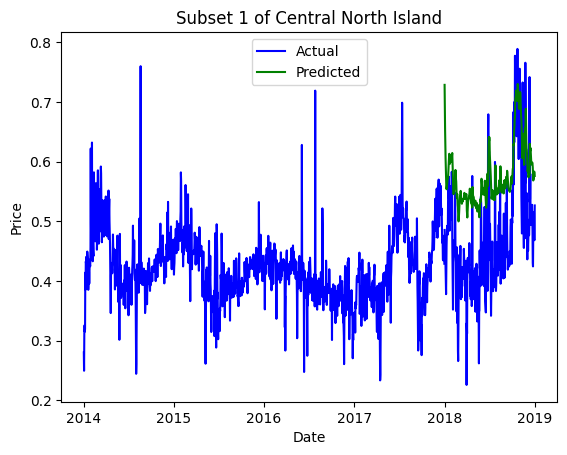

The RMSE of the subset 1 with 150 features using RFE is 0.042681267978841544
Iteration:      1,   Func. Count:      6,   Neg. LLF: 171187244.22414064
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3521897.7605115967
Iteration:      3,   Func. Count:     30,   Neg. LLF: 3092690.40440853
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2192.1562621660155
            Iterations: 3
            Function evaluations: 38
            Gradient evaluations: 3


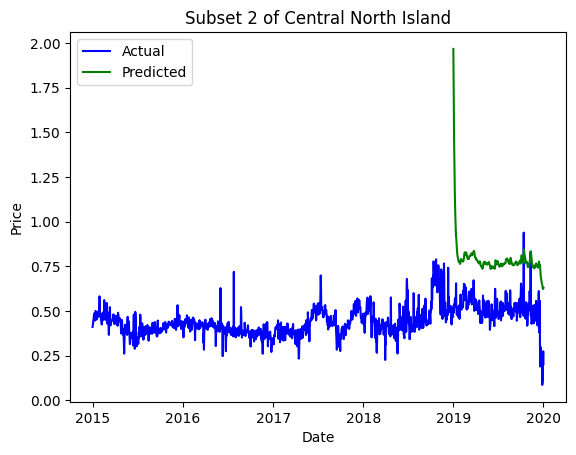

The RMSE of the subset 2 with 150 features using RFE is 0.04841464032495025
Iteration:      1,   Func. Count:      6,   Neg. LLF: 380280227.14257675
Iteration:      2,   Func. Count:     18,   Neg. LLF: -454.9184577002636
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1837.0837174791725
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1515.811829574622
Iteration:      5,   Func. Count:     40,   Neg. LLF: -19.00099811651785
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1853.9811130713028
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1829.324997317286
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1873.5302317157689
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1875.2304748095598
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1875.3382643804143
Iteration:     11,   Func. Count:     74,   Neg. LLF: -1875.3496040078205
Iteration:     12,   Func. Count:     79,   Neg. LLF: -1875.3497216211993
Iteration:     13,   Func. Count:     83,

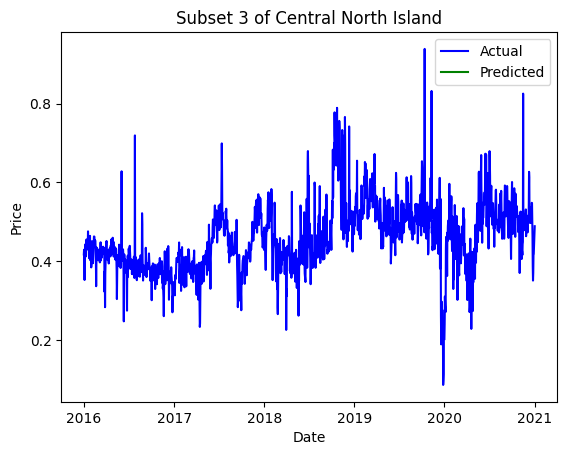

The RMSE of the subset 3 with 2 features using RFE is 0.05182019327539199
Iteration:      1,   Func. Count:      6,   Neg. LLF: 576671.1538961946
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2108.867837607695
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1394.215852533606
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3777189.219013931
Iteration:      5,   Func. Count:     44,   Neg. LLF: -682.2726488315861
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1583.6437265724148
Iteration:      7,   Func. Count:     56,   Neg. LLF: -1603.9234990302825
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1609.3700175463366
Iteration:      9,   Func. Count:     66,   Neg. LLF: -1610.8070069379082
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1611.1960127958573
Iteration:     11,   Func. Count:     76,   Neg. LLF: -1612.6711869058263
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1613.0660855056312
Iteration:     13,   Func. Count:     86,   Neg

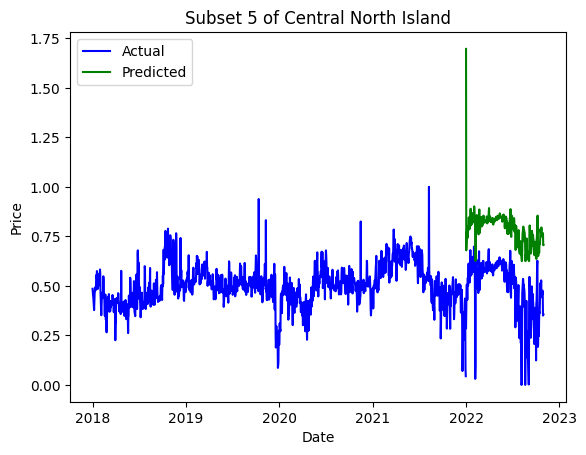

The RMSE of the subset 5 with 50 features using RFE is 0.07117529758775265


In [95]:
n_features_to_select = [1, 2, 3, 5, 10,15 , 20, 25, 50,75, 100,125,150]

for i in range(5):
    X_train = cni_train[i].drop('price_cni', axis=1)
    y_train = cni_train[i]['price_cni']
    X_test = cni_test[i].drop('price_cni', axis=1)
    y_test = cni_test[i]['price_cni']
    
    best_rmse = float('inf')
    best_n_features = None
    
    for n_features in n_features_to_select:
        model = LinearRegression()
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
    
        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
    
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
        if rmse < best_rmse:
            best_rmse = rmse
            best_n_features = n_features
    
    rfe = RFE(estimator=model, n_features_to_select=best_n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    acc = GARCH(X_train_rfe, y_train, X_test_rfe, y_test, 'Central North Island')
    
    print(f'The RMSE of the subset {i+1} with {best_n_features} features using RFE is {best_rmse}')


Iteration:      1,   Func. Count:      6,   Neg. LLF: 127280642.25621188
Iteration:      2,   Func. Count:     18,   Neg. LLF: 37893.17941296022
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30065.653076659382
Iteration:      4,   Func. Count:     39,   Neg. LLF: 13644.317439150505
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1376.4218422581157
Iteration:      6,   Func. Count:     59,   Neg. LLF: 11090.628111630362
Iteration:      7,   Func. Count:     69,   Neg. LLF: -2292.440410258962
Iteration:      8,   Func. Count:     74,   Neg. LLF: 1077.9337476665785
Iteration:      9,   Func. Count:     80,   Neg. LLF: -2277.3106367839773
Iteration:     10,   Func. Count:     87,   Neg. LLF: -2260.9013905977026
Iteration:     11,   Func. Count:     93,   Neg. LLF: -2298.632917057848
Iteration:     12,   Func. Count:     98,   Neg. LLF: -2299.399107966126
Iteration:     13,   Func. Count:    103,   Neg. LLF: -2300.1501909996286
Iteration:     14,   Func. Count:    108,   Neg. 

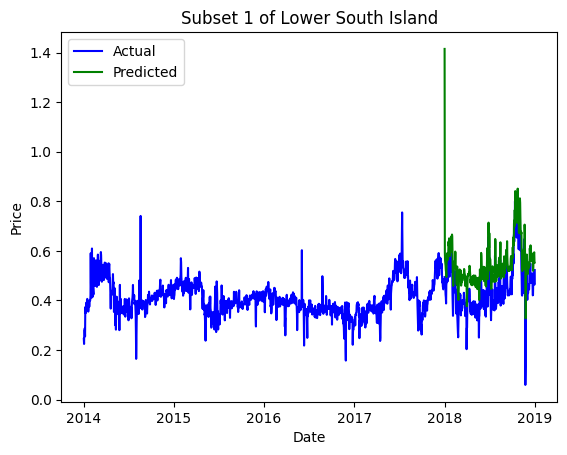

The RMSE of the subset 1 with 150 features using RFE is 0.04629446917818649
Iteration:      1,   Func. Count:      6,   Neg. LLF: 227860558.43822753
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1.28915695134108e+16
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2126.950826858808
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2126.9508321391713
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3


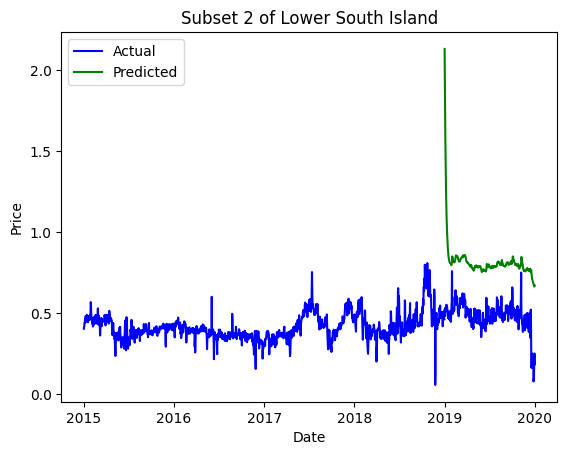

The RMSE of the subset 2 with 150 features using RFE is 0.03901180767014163
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49932504.563742384
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6998.234762549496
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3775.1069766330315
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1103498.016106911
Iteration:      5,   Func. Count:     40,   Neg. LLF: 13728.379045587044
Iteration:      6,   Func. Count:     50,   Neg. LLF: 3881.599430714816
Iteration:      7,   Func. Count:     60,   Neg. LLF: -1776.9433584431404
Iteration:      8,   Func. Count:     66,   Neg. LLF: 204.93604672639867
Iteration:      9,   Func. Count:     73,   Neg. LLF: -1826.302411509285
Iteration:     10,   Func. Count:     79,   Neg. LLF: -1856.308762360141
Iteration:     11,   Func. Count:     84,   Neg. LLF: -1856.5069045197506
Iteration:     12,   Func. Count:     89,   Neg. LLF: -1856.5428742872882
Iteration:     13,   Func. Count:     94,   Neg.

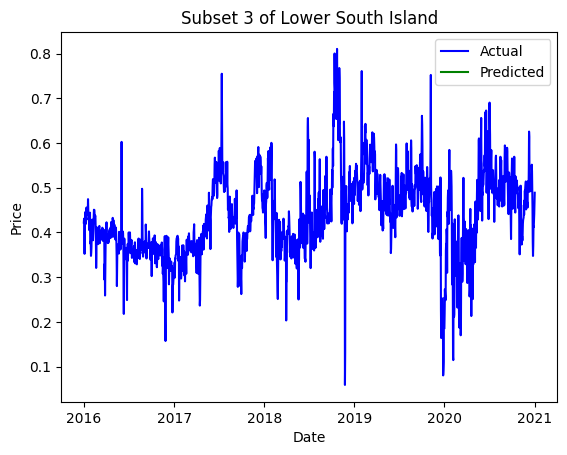

The RMSE of the subset 3 with 1 features using RFE is 0.049751635973080424
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47869076.16932519
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1687.1663011847077
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1598.8123761262696
Iteration:      4,   Func. Count:     30,   Neg. LLF: 263.49450329530555
Iteration:      5,   Func. Count:     37,   Neg. LLF: -1544.6387300210756
Iteration:      6,   Func. Count:     43,   Neg. LLF: -1722.8227072256427
Iteration:      7,   Func. Count:     49,   Neg. LLF: -1749.175276612486
Iteration:      8,   Func. Count:     54,   Neg. LLF: 580.4206698530706
Iteration:      9,   Func. Count:     61,   Neg. LLF: -1722.520168532446
Iteration:     10,   Func. Count:     68,   Neg. LLF: -1749.337917292214
Iteration:     11,   Func. Count:     73,   Neg. LLF: -1749.3391123240126
Iteration:     12,   Func. Count:     78,   Neg. LLF: -1749.339114169646
Iteration:     13,   Func. Count:     82,   Ne

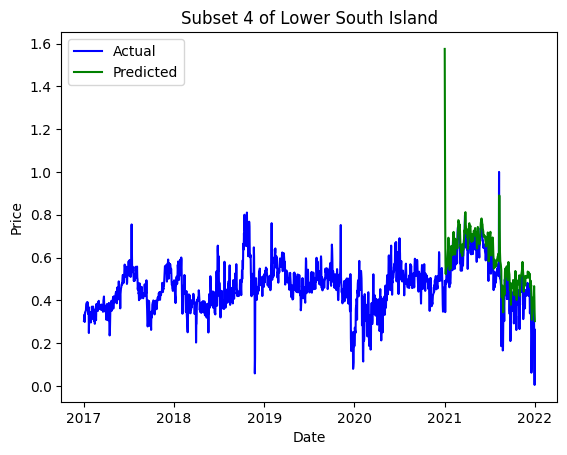

The RMSE of the subset 4 with 150 features using RFE is 0.05052138778206336
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2795150.0464982353
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2593306.7503905925
Iteration:      3,   Func. Count:     26,   Neg. LLF: 758658.0755053257
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1421.8848426188542
Iteration:      5,   Func. Count:     44,   Neg. LLF: -1482.9134717166453
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1482.9134786089903
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 5


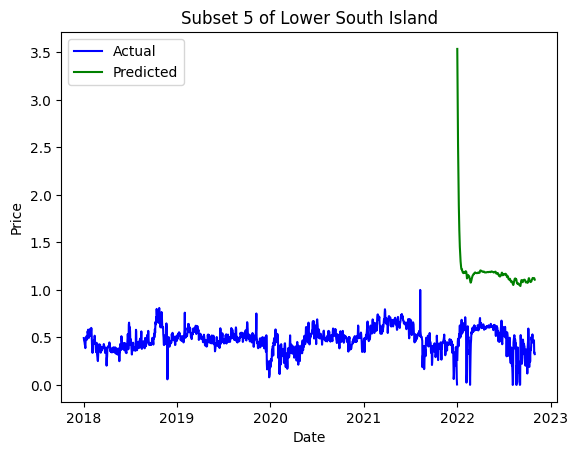

The RMSE of the subset 5 with 50 features using RFE is 0.06880061002536092


In [96]:
n_features_to_select = [1, 2, 3, 5, 10, 20, 25, 50, 100, 150]

for i in range(5):
    X_train = lsi_train[i].drop('price_lsi', axis=1)
    y_train = lsi_train[i]['price_lsi']
    X_test = lsi_test[i].drop('price_lsi', axis=1)
    y_test = lsi_test[i]['price_lsi']
    
    best_rmse = float('inf')
    best_n_features = None
    
    for n_features in n_features_to_select:
        model = LinearRegression()
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
    
        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
    
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
        if rmse < best_rmse:
            best_rmse = rmse
            best_n_features = n_features
    
    rfe = RFE(estimator=model, n_features_to_select= best_n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    acc = GARCH(X_train_rfe , y_train , X_test_rfe , y_test , 'Lower South Island')
    
    print(f'The RMSE of the subset {i+1} with {best_n_features} features using RFE is {best_rmse}')


#### So when compared to both the models and all three feature selection methods DNN with lasso feature selection method gave the best results

**Citation:**

- Author(s): Gaurav Kapoor, Nuttanan Wichitaksorn
- Title: Electricity price forecasting in New Zealand: A comparative analysis of statistical and machine learning models with feature selection
- Journal: Applied Energy
- Volume: 347
- Year: 2023
- Page: 121446
- ISSN: 0306-2619
- DOI: [10.1016/j.apenergy.2023.121446](https://www.sciencedirect.com/science/article/pii/S0306261923008103)
- Abstract: In this study, we present an empirical comparison of statistical models and machine learning models for daily electricity price forecasting in the New Zealand electricity market. We demonstrate the effectiveness of GARCH and SV models and their t-distribution variants when paired with feature selection techniques, including LASSO, mutual information, and recursive feature elimination. A key aspect of our study is the inclusion of a diverse set of explanatory variables in all models. We compare these models against a range of popular machine learning models, including LSTM, GRU, XGBoost, LEAR, and a four-layer DNN, where the latter two are considered benchmarks. Our results reveal that GARCH and SV models, particularly their t variants, perform exceptionally well when paired with feature selection techniques and explanatory variables. In most scenarios considered, these models outperform machine learning models when coupled with LASSO feature selection. This contribution provides a comprehensive evaluation of the performance of different models and feature selection techniques for electricity price forecasting in the New Zealand electricity market. Our best-performing model improves the symmetric mean absolute percentage error (sMAPE) and mean absolute scaled error (MASE) by 2% to 3% over the LEAR benchmark model, highlighting the practical relevance of our findings.
- Keywords: Electricity price forecasting, GARCH, Stochastic volatility, Machine learning, Feature selection, New Zealand electricity market
